# Лента X Яндекс Практикум - Прогнозирование спроса

**Краткое описание:**

Необходимо создать алгоритм прогноза спроса на 14 дней для товаров собственного производства. Гранулярность ТК-SKU-День.  


**Цель:**

 Сгенерировать различные признаки и
 придумать интерпретируемую, описывающую правильные зависимости (повышение цены вызывает логичное падение спроса), модель прогноза спроса.  Дальше необходимо сделать подневной прогноз спроса на тестовом периоде для каждого товара и магазина, и команда Ленты оценит его качество в сравнении с свершившимся фактом. Метрикой качества будет выступать WAPE, посчитанный на уровне товар, магазин, день. Если есть пропущенные значения и по каким-то товарам не предоставлен прогноз, прогноз считается равным нулю.

Требования к результату:

1. Файл в зафиксированном формате с результатом прогноза спроса (sales_submission.csv).
2. Воспроизводимый код на Python
3. Описание решения:

     a.  Описание модели прогноза спроса, которую вы зафитили
           1. Признаки
           2. интерпретация (shapley values),
           3. кросс-валидация
           4. алгоритмы

     b. Описание вашего алгоритма оптимизации:
          1. методология расчетов
          2. скорость оптимизации

## Задача

 Построить модель прогноза спроса на основе мастер данных и данных продаж с учетом разных признаков.  

## Описание данных

**`sales_df_train.csv` –данные по продажам за скользящий год для обучения**    
       
`st_id` – захэшированное id магазина;  
`pr_sku_id` – захэшированное id товара;  
`date` – дата;  
`pr_sales_type_id` – флаг наличия промо;  
`pr_sales_in_units` – число проданных товаров всего (промо и без);  
`pr_promo_sales_in_units` – число проданных товаров с признаком промо;  
`pr_sales_in_rub` – продажи в РУБ всего (промо и без);  
`pr_promo_sales_in_rub` – продажи с признаком промо в РУБ;  
  
**`pr_df.csv` – данные по товарной иерархии**    
От большего к меньшему `pr_group_id` - `pr_cat_id` - `pr_subcat_id` - `pr_sku_id`.
      
`pr_group_id` – захэшированная группа товара;  
`pr_cat_id` – захэшированная категория товара;  
`pr_subcat_id` – захэшированная подкатегория товара;  
`pr_sku_id` – захэшированное id товара;  
`pr_uom_id` (маркер, обозначающий продаётся товар на вес или в ШТ).  
  
**`pr_st.csv` – данные по магазинам**
      
`st_id` – захэшированное id магазина;  
`st_city_id` – захэшированное id города;  
`st_division_code_id` – захэшированное id дивизиона (изначально назывался `st_division_code`);  
`st_type_format_id` – id формата магазина;  
`st_type_loc_id` – id тип локации/окружения магазина;  
`st_type_size_id` – id типа размера магазина;  
`st_is_active` – флаг активного магазина на данный момент.
   
**`sales_submission.csv` – пример файла с результатом работы модели прогноза спроса**  
Необходимо подготовить файл в таком же формате, заполнив колонку target предсказаниями (по умолчанию колонка заполнена нулями).  
    
`st_id` – захэшированное id магазина;  
`pr_sku_id` – захэшированное id товара;  
`date` – дата (день);  
`target` – спрос в ШТ.

## План работ

*Пишем, что сделано и что думаете сделать.*

**23.09**   
**Даша**  
*Сделано:*   

- Обновлен импорт файлов (можно подтянуть свою директорию)
- Парсинг дат сразу при импорте файлов
- Изменила название столбца `st_division_code` на `st_division_code_id` для единообразия с ТЗ
- EDA для df_sales при помощи pandas profiling. Выводы написаны после профайла - для предобработки.

*Сделать:*  
- Импорт файлов: можно подтягивать файлы из общего облака. И на будушее надо подумать, как мы будем тянуть файлы из БД (вопрос был от бэка: названия всех столбцов должны судя по всему совпадать для синхронизации с бэком)

**24.09**  
**Даша**  
*Сделано:*  
  
- phik корреляция для всех основных df (корреляция по столбцам).  
- Анализ временных рядов. Видны зависимости по месяцам + внутри недели.  

  
*Сделать:*  
- Для phik не писала выводы + нужно решить, что делать с сильно коррелирующими столбцами.  
- Учесть сезоннность в 1) лаговых фичах 2) простых фичах типа "день", "число", "месяц" (см. что писала в телеграме)  
- Можно (нужно?) еще поковыряться в сезонности/трендах/шумах. Ресемплировать по-другому (по неделям кстати не получилось, говорит, мало данных). Правильно ли, что для анализа я агрегирую `df_full_sales` по date? Нужно подумать над агрегирующими функциями и какие столбцы анализировать. Я проводила анализ по сумме `pr_sales_in_units`. Есть ли смысл проводить анализ временного ряда по `pr_sales_in_rub` (корреляция 0.61)?  Наверное интересно посмотреть сезонность/тренды, например, по количеству тех или иных категорий продуктов. Либо по весовым/штучным товарам.
- Осилить prophet - сделать его как фичи для бустинга  
- Почистить дубликаты  
- Есть ли пропуски в финальном df? Я не проверяла. Если есть, нужно обработать.
  
**25.09**  
**Даша**
  
*Сделано*:
- Добавила SHAP.
- Проверила СВ без Prophet: rolling=30, max_lag=30, iterations=500 (лень было ждать, поставлю сейчас 1000 на ночь), depth=10. wape=0.306.
- При rolling=14, max_lag=14, iterations=1000 wape = 0.256, самые важные фичи: rolling_mean (может наоборот сделать его еще меньше, =7?), risk_factor_no_promo, clusters, rolling_std, pr_sku_id, pr_subcat_id, pr_uom_id, затем все лаги.

**25.09**   
**Влад**


*Сделано:*
* Добавил коэф риска по каждому магазину
* Сделал knn, пожоже придется 5 моделей строить для каждой группы, также по размеру 5 зашифрованных параметров, кластеры и зашифрованые размеры не всегда совподают
* разбераюсь с профет, и смотрю алгоримы для подбора гипперпарметров  один из них https://dzen.ru/a/Yp7abcmh139Y_znw
* профет так мне не покарился подумаю позже на свежую голову

__25.09__
__Паша__

- Сделал профет
- Посчитал все корреляции, жду ответа, как их применить грамотно
- Затюнул тестовую модель catboost`а
- Поменял пару функций для FE

- Сорри, что первый раз сюда отписал

## Импорт библиотек

In [1]:
!pip install pandas-profiling
!pip install catboost
!pip install tsfresh
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=253f1c2e6549a4b27f610279c247e48308aa268400be6c5862a610fb3319c55a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import numpy as np
from scipy import stats
from scipy.stats import norm, poisson
from statsmodels.tsa.seasonal import seasonal_decompose
import shap
from prophet import Prophet
import tsfresh

import phik
from phik.report import plot_correlation_matrix
from phik import report
import pandas as pd
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


from catboost import CatBoostRegressor

Mounted at /content/drive


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


## Функции

In [3]:
def wape(y_true: np.array, y_pred: np.array):
    return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))


# теперь мы можем делать несколько rolling-фичей
def features_generation(max_lag, *rolling):
    for lag in range(1, max_lag + 1):
        df_full_sales['lag_{}'.format(lag)] = df_full_sales['pr_sales_in_units'].shift(lag)
    for roll in rolling:
        df_full_sales['rolling_mean_' + str(roll)] = (df_full_sales['pr_sales_in_units'].shift(1).
        rolling(roll).mean())
        df_full_sales['rolling_std_' + str(roll)] = (df_full_sales['pr_sales_in_units'].shift(1).
        rolling(roll).std())


def distribution(df):
    sns.distplot(df[df != 0], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df[df != 0], plot=plt)

def logging(df):
    df = np.where(df != 0, np.log(df), 0)
    sns.distplot(df[df != 0], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df[df != 0], plot=plt)

In [ ]:
def plot_phik_overview(dataframe):
    phik_overview = dataframe.phik_matrix()

    # Устанавливаем диапазон значений цветовой карты
    cmap = plt.cm.get_cmap('Purples', 11) # Градиент от 0 до 1 с 11 различными цветами

    figure, axes = plt.subplots(figsize=(8, 8))
    axes.imshow(phik_overview, cmap=cmap, aspect='auto')

    axes.set_xticks(np.arange(len(phik_overview.columns)))
    axes.set_xticklabels(phik_overview.columns, rotation=90, fontsize=10)

    axes.set_yticks(np.arange(len(phik_overview.columns)))
    axes.set_yticklabels(phik_overview.columns, fontsize=10)

    # Добавляем значения в ячейки
    for i in range(len(phik_overview.columns)):
        for j in range(len(phik_overview.columns)):
            text = axes.text(j, i, round(phik_overview.iloc[i, j], 2),
                             ha='center', va='center', color='black')

    # Добавляем цветовую шкалу
    plt.colorbar(axes.imshow(phik_overview, cmap=cmap, aspect='auto'),
                 ticks=np.arange(0, 1.1, 0.1))

    plt.title(r'correlation $\phi_K$', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
def round_columns_to_int(df, columns):
    """
    Округляет все значения в выбранных столбцах до целых чисел.

    - df: pd.DataFrame - исходный датафрейм, в котором нужно округлить значения столбцов.
    - columns: List[str] - список названий столбцов, значения в которых нужно округлить до целых чисел.

    """
    df[columns] = df[columns].round().astype(int)
    return df

## Константы

In [ ]:
random_state = np.random.RandomState(42)

## Предобработка и EDA

### Импорт файлов

Импорт при помощи библиотеки os, чтобы мы могли при необходимости открывать файлы из разных путей. Сразу спарсим даты:

In [4]:
pth1 = '/content/drive/MyDrive/sp_sales_task/'
pth2 = 'другой путь'

files = ['sales_df_train.csv',
         'pr_df.csv',
         'st_df.csv',
         'sales_submission.csv',
         'holidays_covid_calendar.csv']

names = ['df_sales',
         'df_pr',
         'df_pr_st',
         'df_sales_sub',
         'holidays_df']

for name, file in zip(names, files):
    df_name = name
    if os.path.exists(pth1 + file):
        df = pd.read_csv(pth1 + file)
    elif os.path.exists(pth2 + file):
        df = pd.read_csv(pth2 + file)
    else:
        print('Something is wrong')
        continue

    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

    globals()[df_name] = df

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


### df_sales

Посмотрим, как выглядят исходные файлы:

In [ ]:
df_sales.sort_values(by='date').tail(2)

st_id                         pr_sku_id  \
672233  6364d3f0f495b6ab9dcf8d3b5c6e0b01  22b3872c9768b6070e1111d85e8e9660   
779153  c81e728d9d4c2f636f067f89cc14862c  a7a9eb3ffb9634e37c50995c34da34d0   

             date  pr_sales_type_id  pr_sales_in_units  \
672233 2023-07-18                 0                0.0   
779153 2023-07-18                 0                5.0   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  
672233                      0.0            106.0                    0.0  
779153                      0.0            250.0                    0.0

In [ ]:
df_sales.dtypes

st_id                              object
pr_sku_id                          object
date                       datetime64[ns]
pr_sales_type_id                    int64
pr_sales_in_units                 float64
pr_promo_sales_in_units           float64
pr_sales_in_rub                   float64
pr_promo_sales_in_rub             float64
dtype: object

Строки с id товара `29d828d283d16edcaa8c712375fc5e2a`, смотрим на строки с промо:

In [ ]:
df_sales.sort_values(by='date')[df_sales['pr_sku_id'] == '29d828d283d16edcaa8c712375fc5e2a'].head(3)

# обратите внимание на строки с промо
# нужно ограничивать такие выводы (кол-во строк для вывода), иначе тратим память и время. Добавила head

<ipython-input-9-aabfbb7a12a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sales.sort_values(by='date')[df_sales['pr_sku_id'] == '29d828d283d16edcaa8c712375fc5e2a'].head(3)


st_id                         pr_sku_id  \
576366  c81e728d9d4c2f636f067f89cc14862c  29d828d283d16edcaa8c712375fc5e2a   
268831  c81e728d9d4c2f636f067f89cc14862c  29d828d283d16edcaa8c712375fc5e2a   
164140  c81e728d9d4c2f636f067f89cc14862c  29d828d283d16edcaa8c712375fc5e2a   

             date  pr_sales_type_id  pr_sales_in_units  \
576366 2022-08-01                 1                0.0   
268831 2022-08-01                 0                1.0   
164140 2022-08-02                 0                4.0   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  
576366                      0.0            152.0                  152.0  
268831                      0.0            325.0                    0.0  
164140                      0.0           1405.0                    0.0

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    883015 non-null  object        
 1   pr_sku_id                883015 non-null  object        
 2   date                     883015 non-null  datetime64[ns]
 3   pr_sales_type_id         883015 non-null  int64         
 4   pr_sales_in_units        883015 non-null  float64       
 5   pr_promo_sales_in_units  883015 non-null  float64       
 6   pr_sales_in_rub          883015 non-null  float64       
 7   pr_promo_sales_in_rub    883015 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 53.9+ MB


Пропусков нет.

In [ ]:
# Задаем значение 0 для столбцов 'pr_sales_in_units' и 'pr_sales_in_rub' в строках, где значение столбца 'pr_sales_type_id' равно 1.
# Зачем? Пока закомментировала

# sales.loc[sales['pr_sales_type_id'] == 1, ['pr_sales_in_units', 'pr_sales_in_rub']] = 0

In [ ]:
(df_sales['pr_sales_in_rub'] < 0).sum()

78

In [ ]:
# Зачем перезаписываем датафрейм sales? Или туплю
# Потому что там минусовые значения, которые надо убрать

df_sales = df_sales.loc[(df_sales['pr_sales_in_rub'] >= 0) & (df_sales['pr_promo_sales_in_rub'] >= 0)]
df_sales = df_sales.loc[(df_sales['pr_sales_in_units'] >= 0) & (df_sales['pr_promo_sales_in_units'] >= 0)]

In [ ]:
df_sales.describe()

pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
count     882936.000000      882936.000000            882936.000000   
mean           0.406480           5.038706                 2.230379   
std            0.491176          13.403244                11.063619   
min            0.000000           0.000000                 0.000000   
25%            0.000000           1.000000                 0.000000   
50%            0.000000           2.000000                 0.000000   
75%            1.000000           4.000000                 1.000000   
max            1.000000        2348.000000              2348.000000   

       pr_sales_in_rub  pr_promo_sales_in_rub  
count    882936.000000          882936.000000  
mean        596.800561             294.815576  
std        1577.395277            1402.807967  
min           0.000000               0.000000  
25%          98.000000               0.000000  
50%         224.000000               0.000000  
75%         540.000000             127.000000  
max      183265.000000          183265.000000

Для наглядности построим профайл для датафрейма df_sales, пока мы его не предобработали

In [ ]:
profile = ProfileReport(df_sales, progress_bar=False)
profile

**Выводы:**    
  
8 столбцов  
883к наблюдений  
0 пропусков  
0 дубликатов  
3 категориальных столба, 4 числовых, 1 даты  
  
Значение коэффициента асимметрии (γ1 = 31.57841829) указывает на то, что столбец `pr_sales_in_units` имеет выраженную правостороннюю асимметрию. Это означает, что большинство значений в столбце распределены ближе к нулю, а имеющиеся значения, которые отклоняются от нуля, встречаются реже и существенно влияют на анализ данных.  
Аналогичная ситуация `pr_promo_sales_in_units` и `pr_promo_sales_in_rub`.  
  
*Значение коэффициента асимметрии γ1 больше 0 указывает на правостороннюю асимметрию (большинство значений смещено влево от среднего значения), в то время как значение меньше 0 указывает на левостороннюю асимметрию (большинство значений смещено вправо от среднего значения).*    
  
`st_id` - 12 уникальных значений, т.е. у нас есть данные по 12 магазинам.   
Есть магазины, по которым данным 0.3%, 0.1% и меньше.  
  
`pr_sku_id` - 1991 уникальное значение (1991 позиций товаров).   
  
`date` - нам предоставлены данные за 352 дня с 08.08.2022 23:06:40 по 22.07.2023 04:26:40. 08.08.2022 получается данные даны меньше чем за час, 22.07.2023 только за четыре часа.   
  
`pr_sales_type_id` категориальный столбец, содержит значения 0 и 1 (флаг наличия промо). 59.4% продаж без промо, 40.6% продаж с промо.   
  
`pr_sales_in_units` - число проданных товаров всего. 71 отрицательных значений (<0.1%) - такие строки удалим, т.к. это были возвраты - в прогнозировании спроса мы возвраты не учитываем. 7.5% нулевых значений. Максимальное количество - 2348 (95-ый перцентиль = 18). Выбросы: посмотреть box-and-whiskers plot. После того как избавимся от выбросов еще раз посмотреть гистограмму распределения.  
  
`pr_promo_sales_in_units` - число проданных товаров по промо. Аналогично: 35 отрицательных значений (<0.1%), максимум 2348 (95-ый перцентиль = 10). Проверить и избавиться от выбросов. После того как избавимся от выбросов еще раз посмотреть гистограмму распределения.  
  
`pr_sales_in_rub` - продажи всего в рублях. 78 отрицательных значений - возвраты - удаляем.  Выбросы - проверяем и избавляемся.  
  
`pr_promo_sales_in_rub` - продажи промо в рублях. 36 отрицательных значений - возвраты - удаляем.  Выбросы - проверяем и избавляемся.  


In [ ]:
df_sales['pr_sku_id'].unique().shape

(1991,)

interval columns not set, guessing: ['pr_sales_type_id', 'pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable pr_sku_id is large: 1991. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
  warnings.warn(
<ipython-input-4-ee2eb71ffbad>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples', 11) # Градиент от 0 до 1 с 11 различными цветами


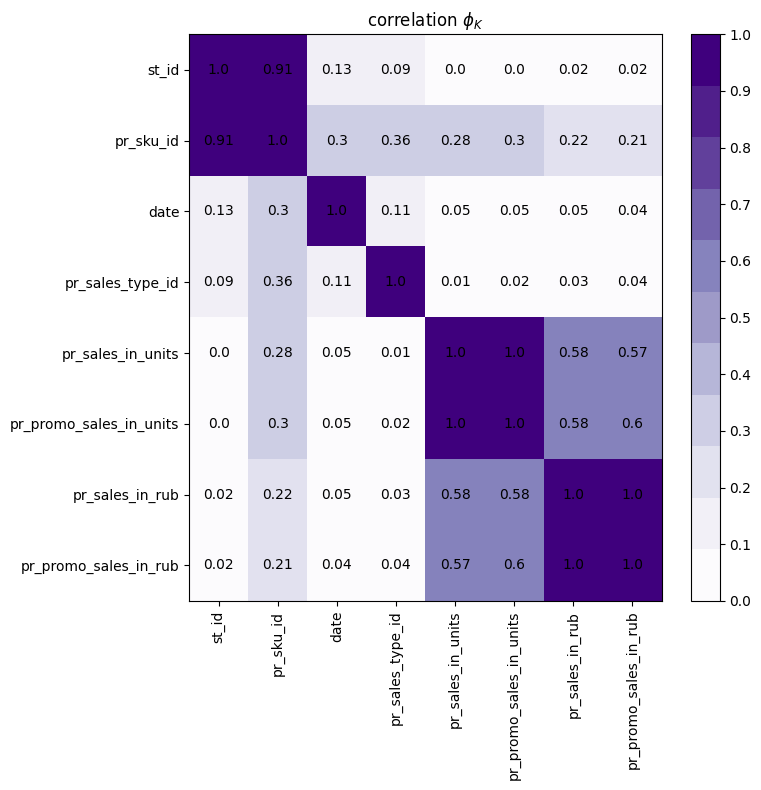

In [ ]:
plot_phik_overview(df_sales)

### df_pr

In [ ]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


In [ ]:
# количество подкатегории в категории
# хотел посмотреть как сильно ветвится
sub_in_cat = (df_pr.groupby('pr_cat_id')[['pr_subcat_id']]
              .count()
              .sort_values(
                  by='pr_subcat_id',ascending=False)
              )
sub_in_cat['pr_cat_id'] = sub_in_cat.index
print('Количество групп:', df_pr['pr_group_id'].unique().shape[0])
print('Количество категорий товаров:',sub_in_cat['pr_cat_id'].count())
print('Количество субкатегорий товаров:',df_pr['pr_subcat_id'].unique().shape[0])
print('Количество товаров:',df_pr['pr_sku_id'].unique().shape[0])

Количество групп: 9
Количество категорий товаров: 43
Количество субкатегорий товаров: 170
Количество товаров: 2050


In [ ]:
# маркер, обозначающий продаётся товар на вес или в ШТ, не понятно,что есть что
# маркер содержит два числа: [17,1]
#df_pr['pr_uom_id'].unique()
# поменяю 17 на 0
#df_pr.loc[df_pr['pr_uom_id'] == 17] = 0
# соотношение классов
#df_pr['pr_uom_id'].mean()

In [ ]:
df_pr.head(2)

pr_sku_id                       pr_group_id  \
0  fd064933250b0bfe4f926b867b0a5ec8  c74d97b01eae257e44aa9d5bade97baf   
1  71c9661741caf40a92a32d1cc8206c04  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
1  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   

   pr_uom_id  
0         17  
1         17

In [ ]:
df_pr.isna().sum()

pr_sku_id       0
pr_group_id     0
pr_cat_id       0
pr_subcat_id    0
pr_uom_id       0
dtype: int64

In [ ]:
df_pr.dtypes

pr_sku_id       object
pr_group_id     object
pr_cat_id       object
pr_subcat_id    object
pr_uom_id        int64
dtype: object

In [ ]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


In [ ]:
# проверил как пересекаются id товаров
print(len(df_sales['pr_sku_id'].unique()))
print((df_pr['pr_sku_id'].unique()).shape)

len(list(set(df_sales['pr_sku_id']) & set(df_pr['pr_sku_id'])))

1991
(2050,)


1991

Небольшой вывод по датафрейму:
* Пропусков нет
* Количество групп: 9
* Количество категорий товаров: 43
* Количество субкатегорий товаров: 170
* Количество товаров: 2050  
* Была аномалия в  маркере за штуку `pr_uom_id`. Отношения вес/штука, если принять, что весовые позиции  =  1, то 60\40  
* 2 полных дубликата строк (0.1%) - удалить  
* `pr_uom_id` - категориальный столбец, значения 1 и 0   


Построим профайл по df_pr:

In [ ]:
profile = ProfileReport(df_pr, progress_bar=False)
profile

interval columns not set, guessing: ['pr_uom_id']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable pr_sku_id is large: 2050. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
  warnings.warn(
<ipython-input-4-ee2eb71ffbad>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples', 11) # Градиент от 0 до 1 с 11 различными цветами


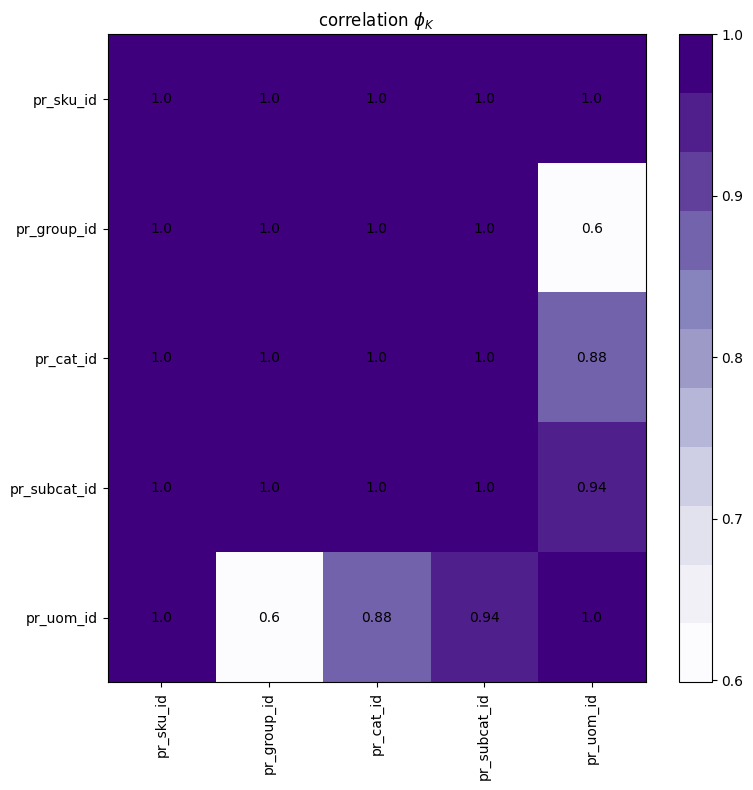

In [ ]:
plot_phik_overview(df_pr)

### df_pr_st

In [ ]:
df_pr_st

st_id                        st_city_id  \
0   1aa057313c28fa4a40c5bc084b11d276  1587965fb4d4b5afe8428a4a024feb0d   
1   bd470ca955d9497bbcb808e59952fffc  955d864a62659945cc9434898e275deb   
2   6364d3f0f495b6ab9dcf8d3b5c6e0b01  b8b4b727d6f5d1b61fff7be687f7970f   
3   1ecfb463472ec9115b10c292ef8bc986  908c9a564a86426585b29f5335b619bc   
4   16a5cdae362b8d27a1d8f8c7b78b4330  c1f75cc0f7fe269dd0fd9bd5e24f9586   
5   53e19f3dbb211f20b20b45668303c1b6  955d864a62659945cc9434898e275deb   
6   42a0e188f5033bc65bf8d78622277c4e  b8b4b727d6f5d1b61fff7be687f7970f   
7   c81e728d9d4c2f636f067f89cc14862c  908c9a564a86426585b29f5335b619bc   
8   fa7cdfad1a5aaf8370ebeda47a1ff1c3  885fe656777008c335ac96072a45be15   
9   f7e6c85504ce6e82442c770f7c8606f0  3202111cf90e7c816a472aaceb72b0df   
10  62f91ce9b820a491ee78c108636db089  1587965fb4d4b5afe8428a4a024feb0d   
11  084a8a9aa8cced9175bd07bc44998e75  3202111cf90e7c816a472aaceb72b0df   

                    st_division_code  st_type_format_id  st_type_loc_id  \
0   81b4dd343f5880df806d4c5d4a846c64                  4               3   
1   e26072c92d8fe0738df44d571d5f5e8b                  4               3   
2   da742b3cfca5388aaf9af28a726a3c30                  1               1   
3   429a86ff6336c144ddaf6144f52ab52c                  2               1   
4   296bd0cc6e735f9d7488ebc8fbc19130                  1               2   
5   e26072c92d8fe0738df44d571d5f5e8b                  4               3   
6   da742b3cfca5388aaf9af28a726a3c30                  1               1   
7   429a86ff6336c144ddaf6144f52ab52c                  1               1   
8   296bd0cc6e735f9d7488ebc8fbc19130                  1               1   
9   32586311f16876abf92901085bd87b99                  1               1   
10  81b4dd343f5880df806d4c5d4a846c64                  4               3   
11  32586311f16876abf92901085bd87b99                  4               3   

    st_type_size_id  st_is_active  
0                19             0  
1                19             1  
2                12             1  
3                28             1  
4                 8             1  
5                20             1  
6                12             1  
7                 8             1  
8                12             1  
9                12             1  
10               32             0  
11               19             1

In [ ]:
print('Количество  магазинов:',df_pr_st['st_id'].unique().shape[0])
print('Количество  городов:',df_pr_st['st_city_id'].unique().shape[0])


Количество  магазинов: 12
Количество  городов: 7


In [ ]:
df_pr_st.dtypes

st_id                object
st_city_id           object
st_division_code     object
st_type_format_id     int64
st_type_loc_id        int64
st_type_size_id       int64
st_is_active          int64
dtype: object

In [ ]:
df_pr_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


Переименуем `st_division_code` в `st_division_code_id`, чтобы название столбцов совпадало с описанием данных:


In [ ]:
df_pr_st = df_pr_st.rename(columns={'st_division_code':'st_division_code_id'})
df_pr_st.dtypes

st_id                  object
st_city_id             object
st_division_code_id    object
st_type_format_id       int64
st_type_loc_id          int64
st_type_size_id         int64
st_is_active            int64
dtype: object

interval columns not set, guessing: ['st_type_format_id', 'st_type_loc_id', 'st_type_size_id', 'st_is_active']


<ipython-input-4-ee2eb71ffbad>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples', 11) # Градиент от 0 до 1 с 11 различными цветами


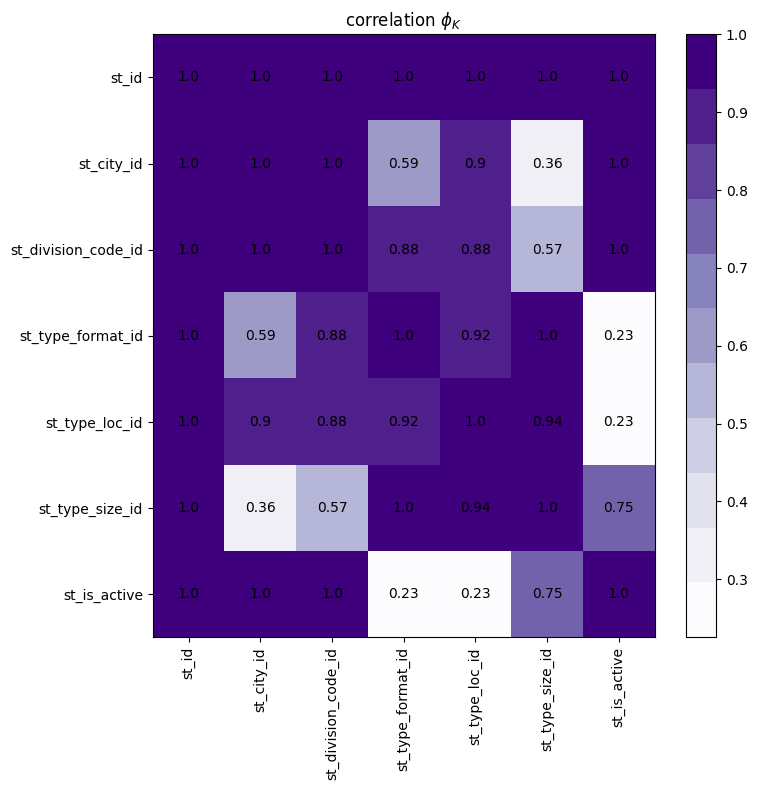

In [ ]:
plot_phik_overview(df_pr_st)

### df_sales_sub

In [70]:
df_sales_sub['st_id'].unique()

array(['16a5cdae362b8d27a1d8f8c7b78b4330',
       '1ecfb463472ec9115b10c292ef8bc986',
       '42a0e188f5033bc65bf8d78622277c4e',
       '53e19f3dbb211f20b20b45668303c1b6',
       '6364d3f0f495b6ab9dcf8d3b5c6e0b01',
       'c81e728d9d4c2f636f067f89cc14862c',
       'f7e6c85504ce6e82442c770f7c8606f0',
       'fa7cdfad1a5aaf8370ebeda47a1ff1c3'], dtype=object)

In [ ]:
df_sales_sub.dtypes

st_id                object
pr_sku_id            object
date         datetime64[ns]
target                int64
dtype: object

In [ ]:
print('Число уникальных магазинов -', len(df_sales['st_id'].unique()))

Число уникальных магазинов - 12


### df_full_sales (sales + pr + pr_st)

In [86]:
df_sales_combine = pd.merge(df_sales, df_pr, on='pr_sku_id')
df_sales_combine.shape

(883015, 12)

In [87]:
df_full_sales = pd.merge(df_sales_combine, df_pr_st, on='st_id')
df_full_sales.head(3)

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
2  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                5.0                      5.0   
1 2023-02-02                 1                1.0                      1.0   
2 2022-10-09                 1                1.0                      1.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            825.0                  825.0  aab3238922bcc25a6f606eb525ffdc56   
1            107.0                  107.0  aab3238922bcc25a6f606eb525ffdc56   
2            167.0                  167.0  aab3238922bcc25a6f606eb525ffdc56   

                          pr_cat_id                      pr_subcat_id  \
0  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   
1  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   
2  28fc2782ea7ef51c1104ccf7b9bea13d  d29b5ce9c2883f0b7e90f79071a2ca82   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1          1  908c9a564a86426585b29f5335b619bc   
2          1  908c9a564a86426585b29f5335b619bc   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  429a86ff6336c144ddaf6144f52ab52c                  1               1   
2  429a86ff6336c144ddaf6144f52ab52c                  1               1   

   st_type_size_id  st_is_active  
0                8             1  
1                8             1  
2                8             1

In [ ]:
(df_full_sales['st_is_active'] == 0).sum()

729

In [ ]:
df_full_sales = df_full_sales.loc[df_full_sales['st_is_active'] == 1]
df_full_sales = df_full_sales.loc[
    (df_full_sales['st_id'] != 'bd470ca955d9497bbcb808e59952fffc') &
    (df_full_sales['st_id'] != '084a8a9aa8cced9175bd07bc44998e75')]

In [ ]:
df_sales_test = df_sales_sub.drop(['target'], axis = 1)
df_sales_test.head(3)

st_id                         pr_sku_id  \
0  16a5cdae362b8d27a1d8f8c7b78b4330  0045ebdb1069ff4b3dd3efe628c39cd3   
1  16a5cdae362b8d27a1d8f8c7b78b4330  00661699f543753ec7e911a64b9fd2f6   
2  16a5cdae362b8d27a1d8f8c7b78b4330  0094042bfeae507dc7f62acc8e5ed03a   

        date  
0 2023-07-20  
1 2023-07-20  
2 2023-07-20

In [ ]:
df_full_sales = df_full_sales.sort_values(by='date', ignore_index = True)

df_full_sales['price'] = np.where(
    df_full_sales['pr_sales_in_units'] > 0,
    df_full_sales['pr_sales_in_rub'] / df_full_sales['pr_sales_in_units'],
    0)
df_full_sales['promo_price'] = np.where(
    df_full_sales['pr_promo_sales_in_units'] > 0,
    df_full_sales['pr_promo_sales_in_rub'] / df_full_sales['pr_promo_sales_in_units'],
    0)
df_full_sales.head(3)

st_id                         pr_sku_id  \
0  42a0e188f5033bc65bf8d78622277c4e  41b4a9b8eee848e2bb335d914128ddc4   
1  c81e728d9d4c2f636f067f89cc14862c  67797f1f0f02ec5ccd5e3abd2d4e5b81   
2  16a5cdae362b8d27a1d8f8c7b78b4330  a269147f3468bca423791e6122789204   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-08-01                 0                2.0                      0.0   
1 2022-08-01                 1                0.0                      0.0   
2 2022-08-01                 1                1.0                      1.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            522.0                    0.0  aab3238922bcc25a6f606eb525ffdc56   
1             72.0                   72.0  aab3238922bcc25a6f606eb525ffdc56   
2             30.0                   30.0  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  9701a1c165dd9420816bfec5edd6c2b1  b81668e0b714d070d01699118c6d6f8c   
1  28fc2782ea7ef51c1104ccf7b9bea13d  b3e70d072fc648f6934c288e44f5c35e   
2  c559da2ba967eb820766939a658022c8  41b1d51c9e3ba9a263361f9cfa0eb434   

   pr_uom_id                        st_city_id  \
0          1  b8b4b727d6f5d1b61fff7be687f7970f   
1          1  908c9a564a86426585b29f5335b619bc   
2         17  c1f75cc0f7fe269dd0fd9bd5e24f9586   

                   st_division_code  st_type_format_id  st_type_loc_id  \
0  da742b3cfca5388aaf9af28a726a3c30                  1               1   
1  429a86ff6336c144ddaf6144f52ab52c                  1               1   
2  296bd0cc6e735f9d7488ebc8fbc19130                  1               2   

   st_type_size_id  st_is_active  price  promo_price  
0               12             1  261.0          0.0  
1                8             1    0.0          0.0  
2                8             1   30.0         30.0

In [ ]:
df_full_sales.isna().sum()

st_id                      0
pr_sku_id                  0
date                       0
pr_sales_type_id           0
pr_sales_in_units          0
pr_promo_sales_in_units    0
pr_sales_in_rub            0
pr_promo_sales_in_rub      0
pr_group_id                0
pr_cat_id                  0
pr_subcat_id               0
pr_uom_id                  0
st_city_id                 0
st_division_code_id        0
st_type_format_id          0
st_type_loc_id             0
st_type_size_id            0
st_is_active               0
price                      0
promo_price                0
dtype: int64

In [ ]:
df_full_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882207 entries, 0 to 882206
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    882207 non-null  object        
 1   pr_sku_id                882207 non-null  object        
 2   date                     882207 non-null  datetime64[ns]
 3   pr_sales_type_id         882207 non-null  int64         
 4   pr_sales_in_units        882207 non-null  float64       
 5   pr_promo_sales_in_units  882207 non-null  float64       
 6   pr_sales_in_rub          882207 non-null  float64       
 7   pr_promo_sales_in_rub    882207 non-null  float64       
 8   pr_group_id              882207 non-null  object        
 9   pr_cat_id                882207 non-null  object        
 10  pr_subcat_id             882207 non-null  object        
 11  pr_uom_id                882207 non-null  int64         
 12  st_city_id      

interval columns not set, guessing: ['pr_sales_type_id', 'pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub', 'pr_uom_id', 'st_type_format_id', 'st_type_loc_id', 'st_type_size_id', 'st_is_active', 'price', 'promo_price']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable pr_sku_id is large: 1991. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable st_is_active for analysis 1. Dropping this column
  warnings.warn(
<ipython-input-4-ee2eb71ffbad>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples', 11) # Градиент от 0 до 1 с 11 различными цветами


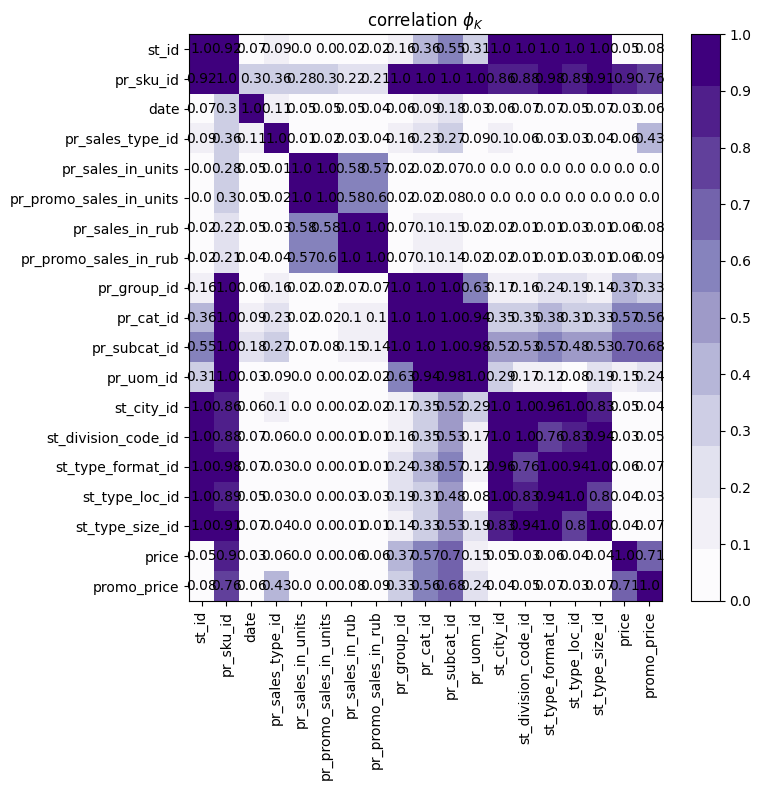

In [ ]:
plot_phik_overview(df_full_sales)

#### Анализ временных рядов

In [ ]:
df_full_sales.head(3)

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  517b5edeb76505d48bb945abce481959   
1  6364d3f0f495b6ab9dcf8d3b5c6e0b01  9d678e20f4a45c137a0492034506d432   
2  f7e6c85504ce6e82442c770f7c8606f0  891517ed336bc63566261723d2a45118   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-08-01                 0                2.0                      0.0   
1 2022-08-01                 0                2.0                      0.0   
2 2022-08-01                 0                5.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub                       pr_group_id  \
0            553.0                    0.0  aab3238922bcc25a6f606eb525ffdc56   
1            367.0                    0.0  aab3238922bcc25a6f606eb525ffdc56   
2            417.0                    0.0  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  186a157b2992e7daed3677ce8e9fe40f  aa36dc1d45661519a5bf923429776a83   
1  9701a1c165dd9420816bfec5edd6c2b1  3d15a2a1c540356f9716dc265dd92382   
2  c559da2ba967eb820766939a658022c8  6e84696301885ba0a9dc8de6fe45abd0   

   pr_uom_id                        st_city_id  \
0          1  908c9a564a86426585b29f5335b619bc   
1          1  b8b4b727d6f5d1b61fff7be687f7970f   
2         17  3202111cf90e7c816a472aaceb72b0df   

                st_division_code_id  st_type_format_id  st_type_loc_id  \
0  429a86ff6336c144ddaf6144f52ab52c                  1               1   
1  da742b3cfca5388aaf9af28a726a3c30                  1               1   
2  32586311f16876abf92901085bd87b99                  1               1   

   st_type_size_id  st_is_active  price  promo_price  
0                8             1  276.5          0.0  
1               12             1  183.5          0.0  
2               12             1   83.4          0.0

Проверим, расположены ли даты в хронологическом порядке:

In [ ]:
df_full_sales.date.is_monotonic_increasing

True

In [ ]:
df_full_sales.date.unique()

array(['2022-08-01T00:00:00.000000000', '2022-08-02T00:00:00.000000000',
       '2022-08-03T00:00:00.000000000', '2022-08-04T00:00:00.000000000',
       '2022-08-05T00:00:00.000000000', '2022-08-06T00:00:00.000000000',
       '2022-08-07T00:00:00.000000000', '2022-08-08T00:00:00.000000000',
       '2022-08-09T00:00:00.000000000', '2022-08-10T00:00:00.000000000',
       '2022-08-11T00:00:00.000000000', '2022-08-12T00:00:00.000000000',
       '2022-08-13T00:00:00.000000000', '2022-08-14T00:00:00.000000000',
       '2022-08-15T00:00:00.000000000', '2022-08-16T00:00:00.000000000',
       '2022-08-17T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-20T00:00:00.000000000',
       '2022-08-21T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-27T00:00:00.000000000', '2022-08-28

In [ ]:
df_full_sales.nunique()

st_id                         10
pr_sku_id                   1991
date                         352
pr_sales_type_id               2
pr_sales_in_units            379
pr_promo_sales_in_units      348
pr_sales_in_rub            12237
pr_promo_sales_in_rub      10838
pr_group_id                    9
pr_cat_id                     43
pr_subcat_id                 167
pr_uom_id                      2
st_city_id                     6
st_division_code_id            5
st_type_format_id              3
st_type_loc_id                 3
st_type_size_id                5
st_is_active                   1
price                      52346
promo_price                35614
dtype: int64

Агрегируем по дате:

In [ ]:
df_agg_date = df_full_sales.groupby('date').agg({
    #'st_id': 'count', #id магазина
    #'pr_sku_id': 'count', #id товара
    'pr_sales_in_units': 'sum', #число проданных товаров всего
    'pr_promo_sales_in_units': 'sum', #число проданных промо товаров
    'pr_sales_in_rub': 'sum', #продажи товаров всего в руб
    'pr_promo_sales_in_rub': 'sum', #продажи промо товаров в руб
    #'pr_group_id': 'count', #группа товара
    #'pr_cat_id': 'count', #категория товара
    #'pr_subcat_id': 'count', #подкатегория товара
    #'pr_uom_id': 'sum', #на вес или штучно
    #'st_city_id': 'count', #id города
    #'st_division_code_id': 'count', #id дивизиона
    #'st_type_format_id': 'count', #id формата магазина
    #'st_type_loc_id': 'count', #id тип локации/окружения магазина
    #'st_type_size_id': 'count', #id типа размера магазина
    #'st_is_active': 'sum', #флаг активного магазина (удалить столбец?)
    'price': 'sum', #цена всего за штуку
    'promo_price': 'sum', #цена всего за штуку промо товаров
    #'month': 'sum',
    #'day': 'sum',
    #'dayofweek': 'sum',
    #'year': 'sum',
    #'rolling_mean': 'mean', #cкользящее среднее для pr_sales_in_units для окна в 14 дней
    #'rolling_std': 'mean', #скользящее стандартное отклонение для pr_sales_in_units для окна в 14 дней
    #'lag_1': 'sum', #значение 'pr_sales_in_units' смещенное на 1 строку вверх
    #'lag_2': 'sum', #значение 'pr_sales_in_units' смещенное на 2 строки вверх
    #'lag_3': 'sum',
    #'lag_4': 'sum',
    #'lag_5': 'sum',
    #'lag_6': 'sum',
    #'lag_7': 'sum',
    #'lag_8': 'sum',
    #'lag_9': 'sum',
    #'lag_10': 'sum',
    #'lag_11': 'sum',
    #'lag_12': 'sum',
    #'lag_13': 'sum',
    #'lag_14': 'sum', #значение 'pr_sales_in_units' смещенное на 14 строк вверх
    }).reset_index().set_index('date')

In [ ]:
df_agg_date.shape

(352, 6)

In [ ]:
df_agg_date = round_columns_to_int(df_agg_date, ['pr_sales_in_units',
                                                 'pr_promo_sales_in_units',
                                                 'pr_sales_in_rub',
                                                 'pr_promo_sales_in_rub',
                                                 'price',
                                                 'promo_price'
                                                 ]
                                   )

In [ ]:
df_agg_date.head(3)

pr_sales_in_units  pr_promo_sales_in_units  pr_sales_in_rub  \
date                                                                      
2022-08-01               9605                     2978          1051959   
2022-08-02              10804                     3902          1299296   
2022-08-03              10631                     3511          1246275   

            pr_promo_sales_in_rub   price  promo_price  
date                                                    
2022-08-01                 336452  283469        80863  
2022-08-02                 545576  279510        88565  
2022-08-03                 428822  296080        89588

In [ ]:
df_agg_date.index.is_monotonic_increasing

True

Ресемплирование пока делать не будем, изучим изменение заказов по дням.  
Посмотрим на суммарное количество заказов по дням с 01.08.2022 по 22.07.2023. Чтобы во временном ряду снизить колебания, применим скользящее среднее (*не знаю, какое окно лучше, выбрала неделю для пристрелки*):

In [ ]:
df_agg_date_roll = df_agg_date[['pr_sales_in_units']].copy()
df_agg_date_roll['rolling_mean'] = df_agg_date_roll.rolling(7).mean()

In [ ]:
df_agg_date_roll.head(10)

pr_sales_in_units  rolling_mean
date                                       
2022-08-01               9605           NaN
2022-08-02              10804           NaN
2022-08-03              10631           NaN
2022-08-04              12992           NaN
2022-08-05              18212           NaN
2022-08-06              17945           NaN
2022-08-07              12192  13197.285714
2022-08-08               9964  13248.571429
2022-08-09               9994  13132.857143
2022-08-10              10156  13065.000000

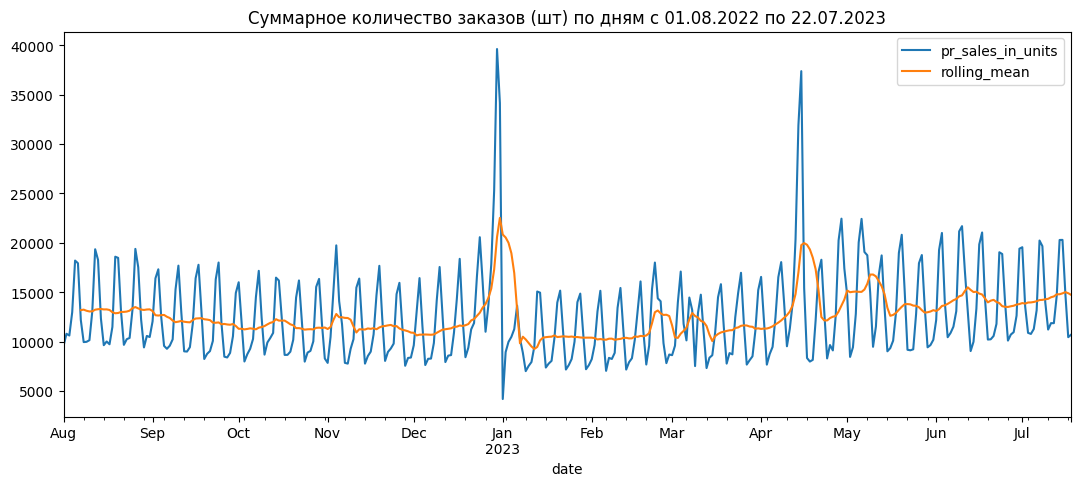

In [ ]:
df_agg_date_roll.plot(title='Суммарное количество заказов (шт) по дням с 01.08.2022 по 22.07.2023',
                      figsize=(13,5)
                      );

Явного тренда на увеличение продаж нет (возможно увеличение в летние месяцы?). Большие всплески на Новый год (и сразу спад после - люди доедают) и Пасху. Небольшие всплески на ноябрьские каникулы, 23 февраля, 8 марта, майские праздники.

Разложим временной ряд на три составляющие: тренд, сезонность и остаток. Посмотрим на образовавшиеся зависимости:

In [ ]:
df_agg_date[['pr_sales_in_units']].shape

(352, 1)

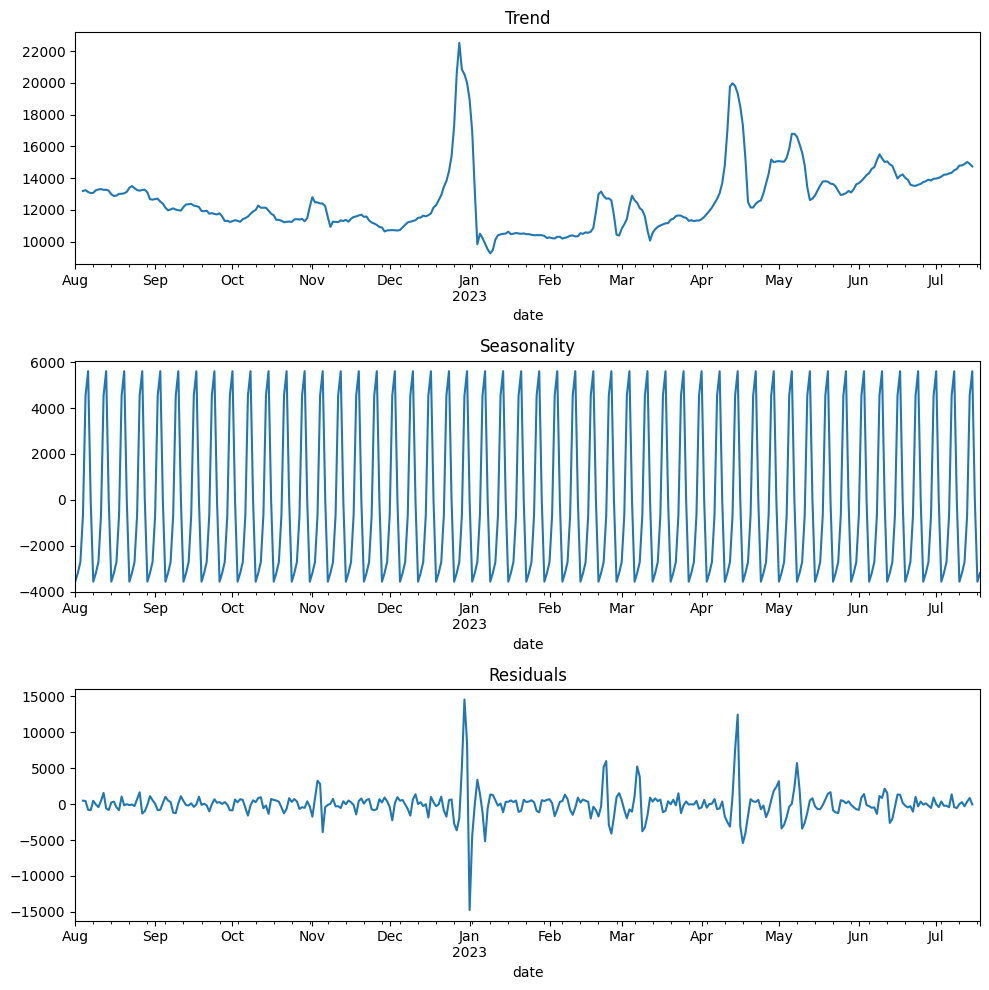

In [ ]:
decomposed = seasonal_decompose(df_agg_date[['pr_sales_in_units']])

plt.figure(figsize=(10, 10))
plt.subplot(311)

# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Виден тренд роста продаж в летние месяцы. Можно посмотреть, скорее всего это связано с продуктами на развес (сезон фруктов).

Изменим масштаб: проверим сезонность внутри одного месяца (выберем первую половину октября 2022, где нет праздников и дополнительных выходных):

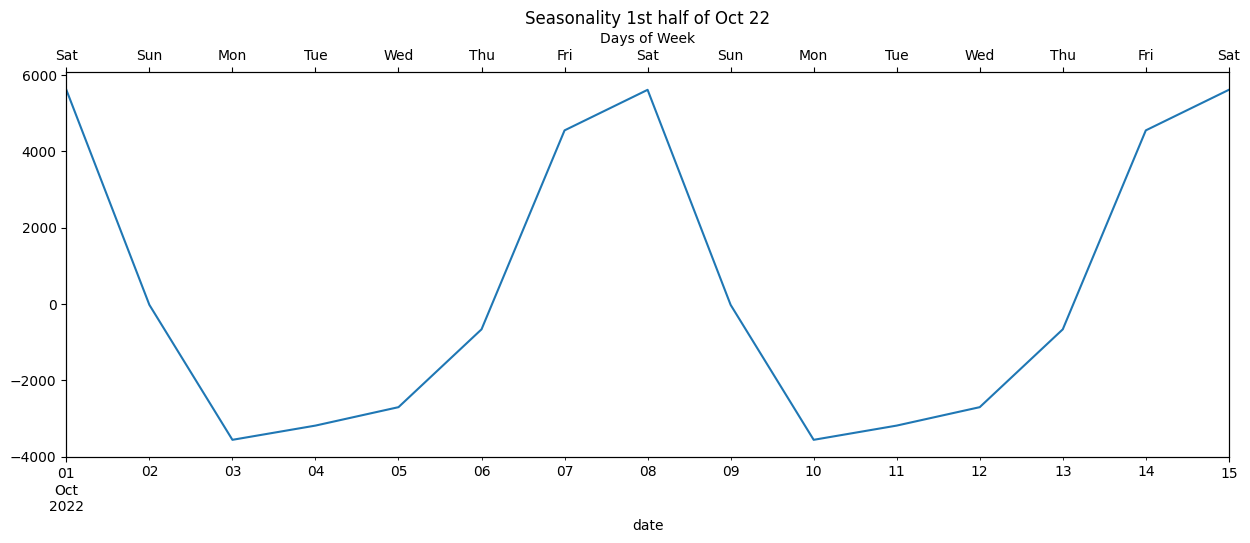

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
decomposed.seasonal['2022-10-01':'2022-10-15'].plot(ax=ax)
ax2 = ax.twiny()
ax2.set_xticks(np.arange(len(decomposed.seasonal['2022-10-01':'2022-10-15'])))
ax2.set_xticklabels(decomposed.seasonal['2022-10-01':'2022-10-15'].index.strftime('%a'))
ax2.set_xlabel('Days of Week')
plt.title('Seasonality 1st half of Oct 22');

Видим, что есть цикличные изменения по неделям. Больше всего продуктов покупают по субботам (на втором месте пятница - думаю, когда люди уезжают на выходные на дачу). Минимальные закупки по понедельникам.

### Выбросы

### Исследование на нормальность

<ipython-input-3-82c058bc84b0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df != 0], fit=norm);


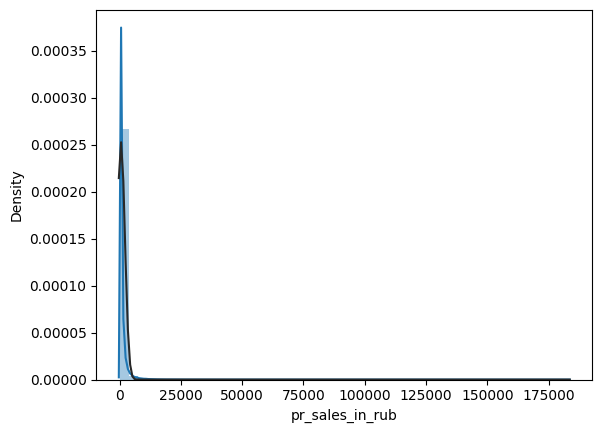

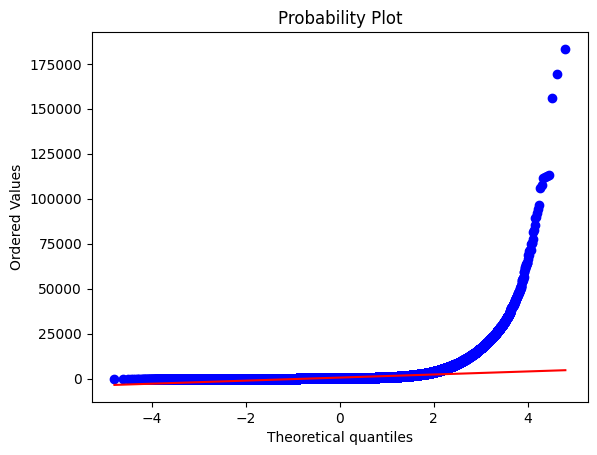

In [ ]:
# проверяем распределение данных
distribution(df_full_sales['pr_sales_in_rub'])

divide by zero encountered in log
invalid value encountered in log


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



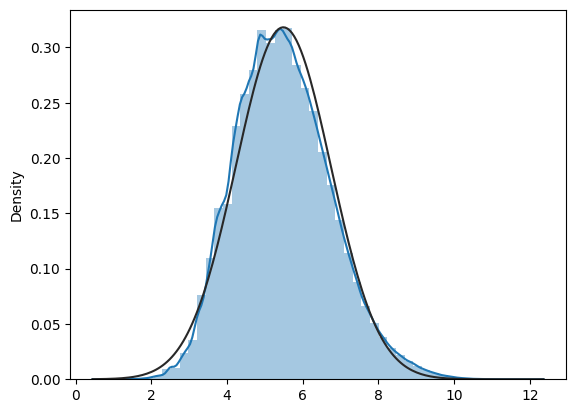

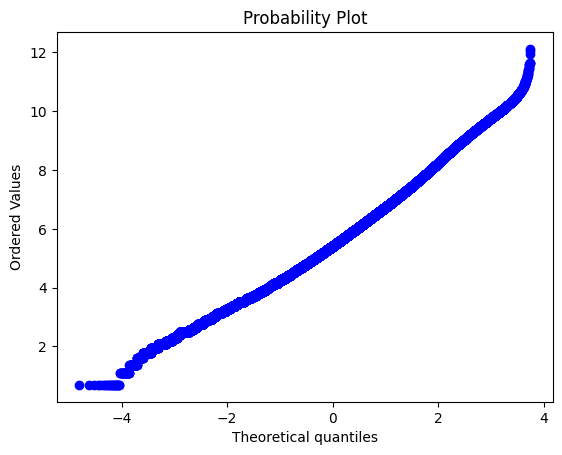

In [ ]:
# логарифмируем, тем самым исправляем распределение
logging(df_full_sales['pr_sales_in_rub'])

<ipython-input-3-82c058bc84b0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df != 0], fit=norm);


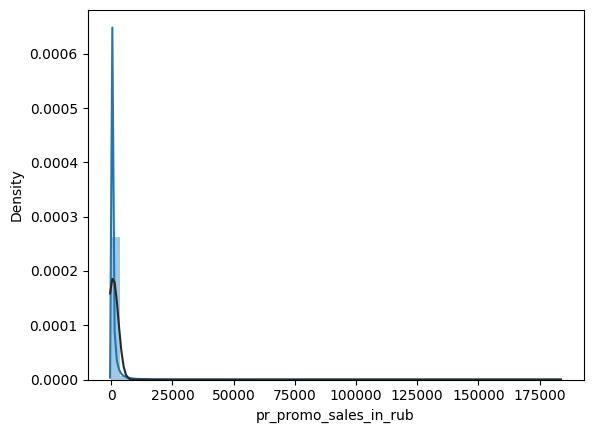

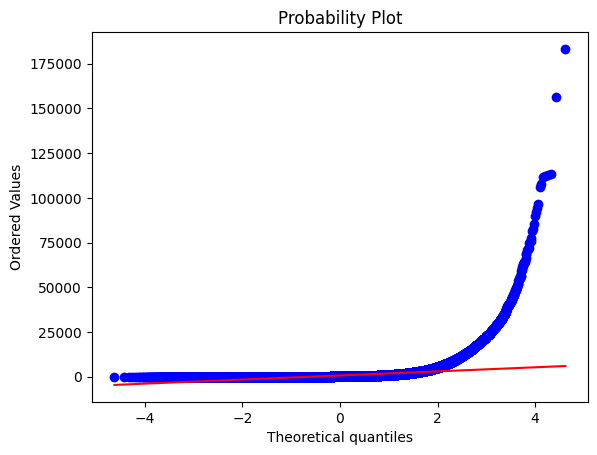

In [ ]:
distribution(df_full_sales['pr_promo_sales_in_rub'])

divide by zero encountered in log


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



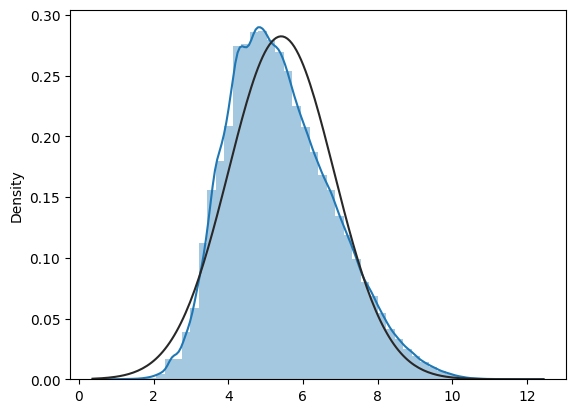

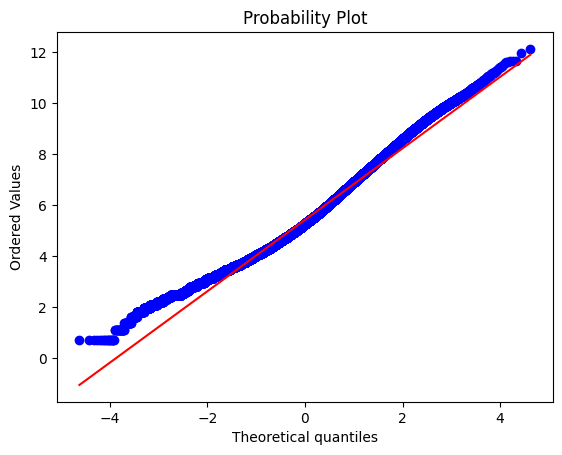

In [ ]:
logging(df_full_sales['pr_promo_sales_in_rub'])

<ipython-input-3-82c058bc84b0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df != 0], fit=norm);


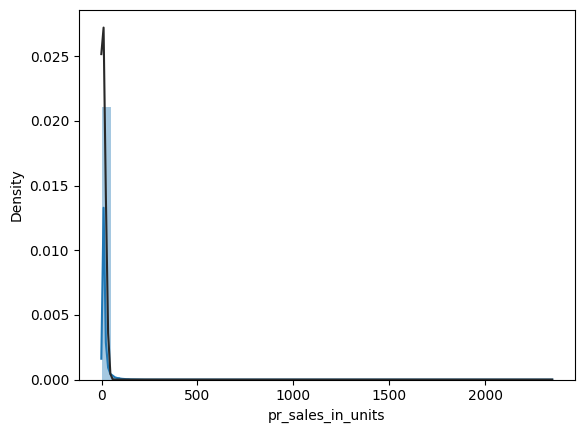

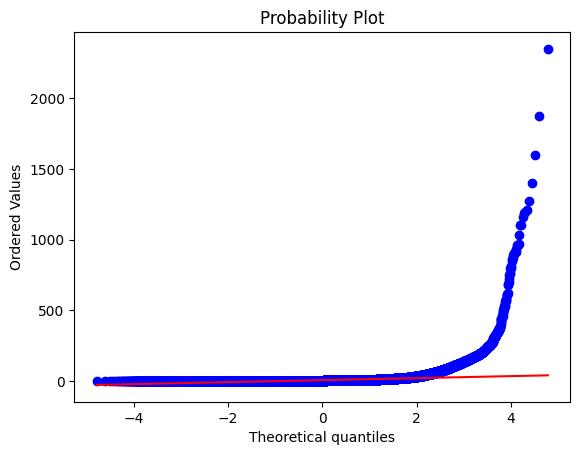

In [ ]:
distribution(df_full_sales['pr_sales_in_units'])

divide by zero encountered in log


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



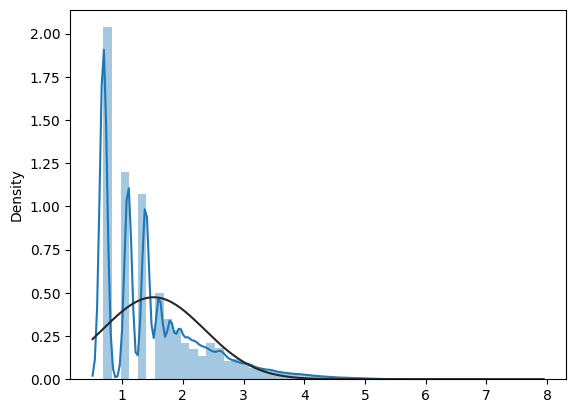

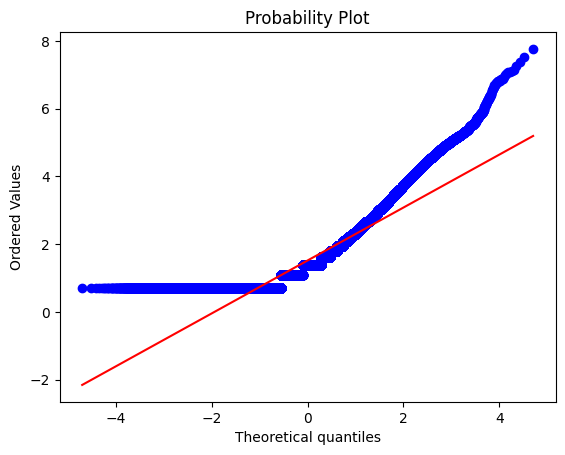

In [ ]:
# тут распределение пуассона
logging(df_full_sales['pr_sales_in_units'])

<ipython-input-3-82c058bc84b0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df != 0], fit=norm);


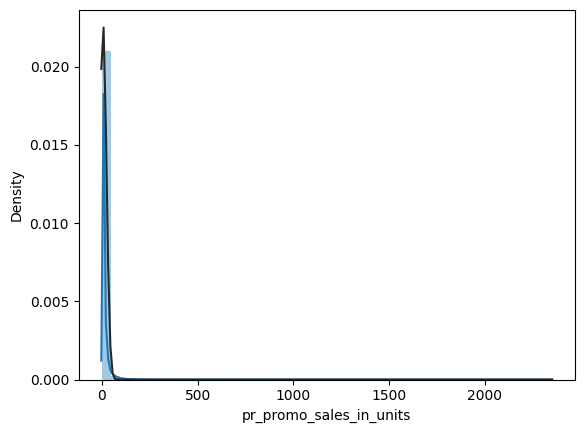

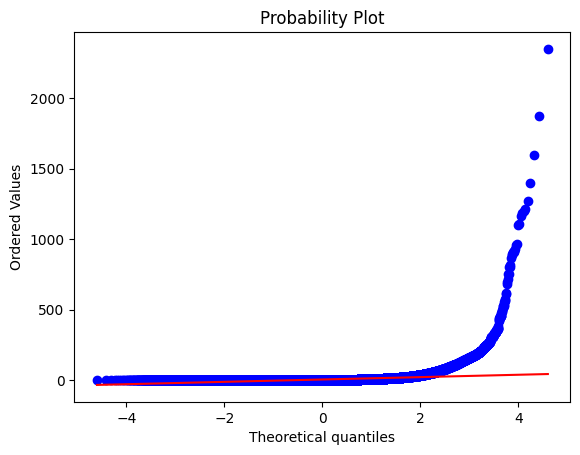

In [ ]:
distribution(df_full_sales['pr_promo_sales_in_units'])

divide by zero encountered in log


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



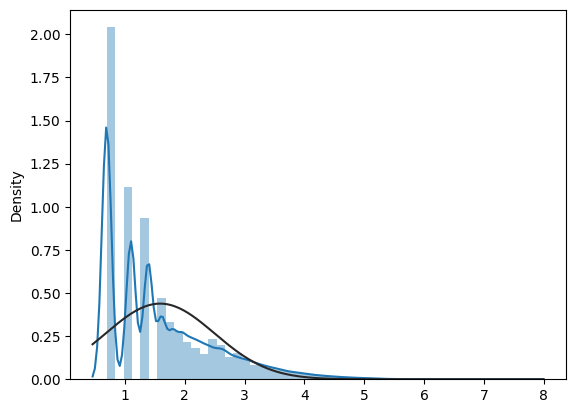

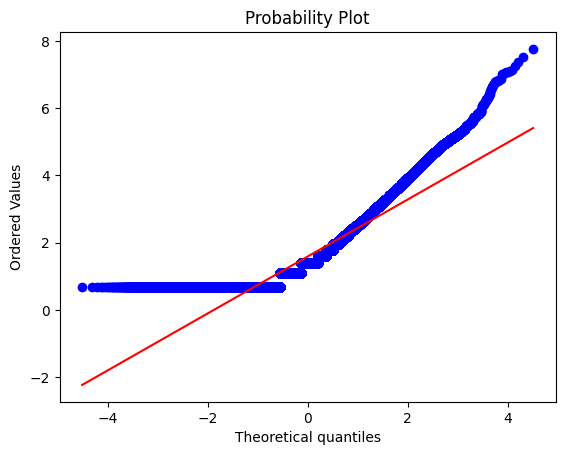

In [ ]:
logging(df_full_sales['pr_promo_sales_in_units'])

<ipython-input-3-82c058bc84b0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df != 0], fit=norm);


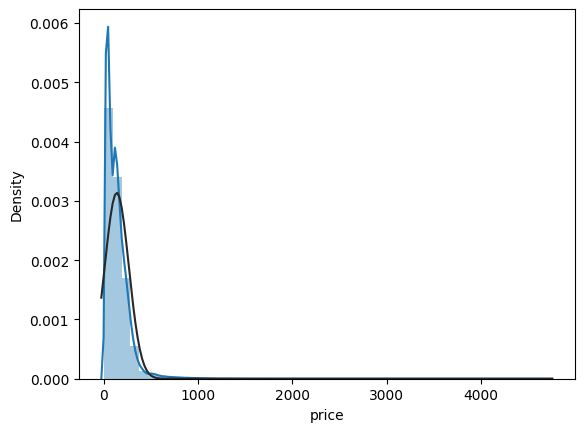

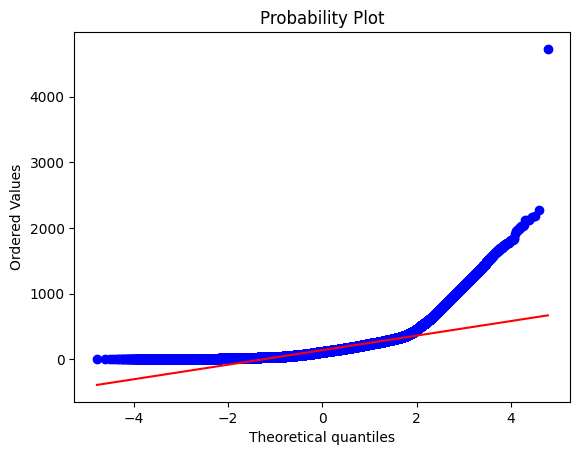

In [ ]:
distribution(df_full_sales['price'])

In [ ]:
logging(df_full_sales['price'])

KeyError: ignored

<ipython-input-3-82c058bc84b0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df != 0], fit=norm);


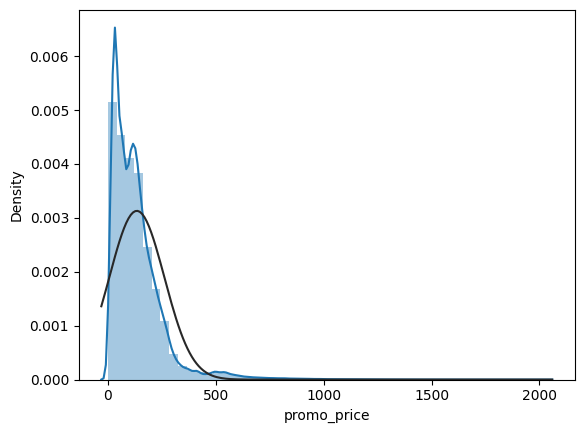

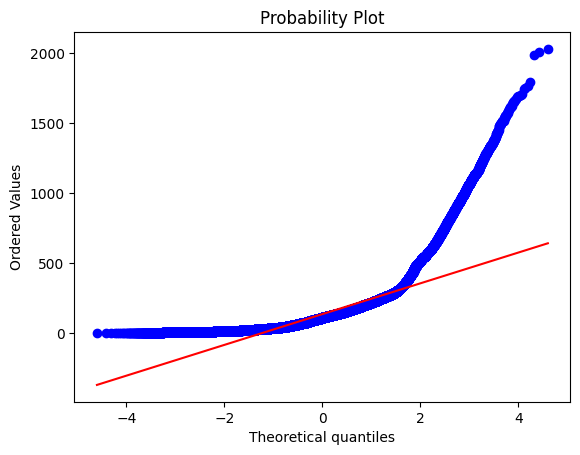

In [ ]:
distribution(df_full_sales['promo_price'])

In [ ]:
logging(df_full_sales['promo_price'])

KeyError: ignored

## Проверка для кластеризации

Сеть гипермаркетов Лента предлагает различные форматы магазинов, которые можно классифицировать по размеру. Вот некоторые из них:

    Малые магазины: до 250 кв.м.
    Средние магазины: от 251 кв.м. до 1000 кв.м.
    Большие магазины: от 1001 кв.м. до 3500 кв.м.
    Очень большие магазины: от 3501 кв.м

In [27]:

from sklearn.cluster import KMeans, AgglomerativeClustering


# Выбор признаков
list_number_columns = ['pr_sales_in_units','pr_sales_in_rub',
                       'pr_promo_sales_in_rub','st_type_format_id','st_type_size_id','price','promo_price']

In [ ]:

# Массив остатков
residuals = []

# Перебор количества кластеров
for n_clusters in range(2, 13):

    # Инициализация алгоритма
    kmeans = KMeans(n_clusters=n_clusters,n_init=10, init="k-means++")

    # Кластеризация данных
    kmeans.fit(df_full_sales[list_number_columns])

    # Расчет остатков
    residuals.append(kmeans.inertia_)

# # Вывод графиков остатков
# plt.plot(range(2, 13), residuals)
# plt.xlabel("Количество кластеров")
# plt.ylabel("Остатки")
# plt.show()

# Выбор наиболее похожих магазинов
#similar_clusters = [labels == i for i in labels.unique()]

# Определение кластеров
#labels = kmeans.labels_

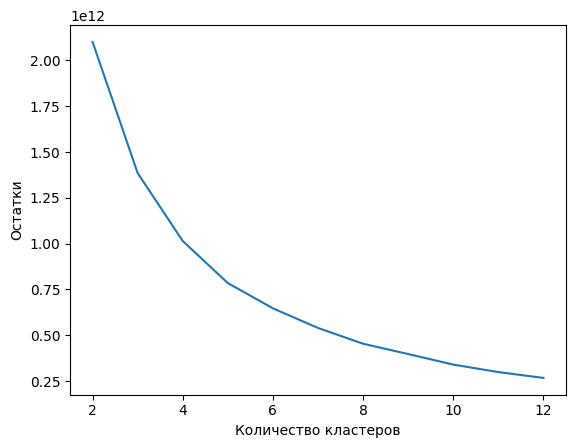

In [ ]:
# Вывод графиков остатков
plt.plot(range(2, 13), residuals)
plt.xlabel("Количество кластеров")
plt.ylabel("Остатки")
plt.show()

In [ ]:
df_full_sales['st_type_size_id'].unique()

array([ 8, 12, 28, 20, 19])

Небольшой вывод:
Хоть официально форматов магазинов  4, метод ближайших соседей показал, что оптимальное число кластеров 5, так же в данных указано 5 уникальных значений для типа размера. Необходима 5 моделей для каждого кластера

In [28]:


# Инициализация алгоритма
kmeans = KMeans(8,n_init=10, init="k-means++")

# Кластеризация данных
kmeans.fit(df_full_sales[list_number_columns])
# Определение кластеров
labels = kmeans.labels_

#Сохраняем кластеры
df_full_sales['clusters'] = labels

KeyError: ignored

In [ ]:
df_full_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882207 entries, 0 to 882206
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    882207 non-null  object        
 1   pr_sku_id                882207 non-null  object        
 2   date                     882207 non-null  datetime64[ns]
 3   pr_sales_type_id         882207 non-null  int64         
 4   pr_sales_in_units        882207 non-null  float64       
 5   pr_promo_sales_in_units  882207 non-null  float64       
 6   pr_sales_in_rub          882207 non-null  float64       
 7   pr_promo_sales_in_rub    882207 non-null  float64       
 8   pr_group_id              882207 non-null  object        
 9   pr_cat_id                882207 non-null  object        
 10  pr_subcat_id             882207 non-null  object        
 11  pr_uom_id                882207 non-null  int64         
 12  st_city_id      

In [ ]:
# проверяем различия по разным категориям для дальнейшей кластеризвции
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['st_type_size_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

st_type_size_id          8           12          19          20          28
count            352.000000  352.000000  318.000000  352.000000  352.000000
mean               5.452263    4.862107    1.845942    2.130310    2.721261
std                1.145191    1.601590    0.888415    0.500775    0.486193
min                3.779582    2.943428    0.000000    0.800000    1.549020
25%                4.525620    3.683404    1.250000    1.818182    2.348863
50%                5.317544    4.562724    1.773504    2.000000    2.674078
75%                6.138465    5.453481    2.210714    2.370066    3.022950
max               12.297401   14.327392    8.000000    4.153846    4.228814

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['st_city_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

st_city_id  3202111cf90e7c816a472aaceb72b0df  \
count                             352.000000   
mean                                5.235236   
std                                 2.283046   
min                                 2.456204   
25%                                 3.462332   
50%                                 4.623030   
75%                                 6.239015   
max                                14.923404   

st_city_id  885fe656777008c335ac96072a45be15  \
count                             352.000000   
mean                                4.668642   
std                                 1.681304   
min                                 2.663158   
25%                                 3.552314   
50%                                 4.247390   
75%                                 5.480128   
max                                19.036939   

st_city_id  908c9a564a86426585b29f5335b619bc  \
count                             352.000000   
mean                                4.878660   
std                                 0.868917   
min                                 3.414815   
25%                                 4.217939   
50%                                 4.771453   
75%                                 5.352372   
max                                11.290221   

st_city_id  955d864a62659945cc9434898e275deb  \
count                             352.000000   
mean                                2.064333   
std                                 0.399888   
min                                 1.000000   
25%                                 1.800000   
50%                                 2.018350   
75%                                 2.252717   
max                                 3.652174   

st_city_id  b8b4b727d6f5d1b61fff7be687f7970f  c1f75cc0f7fe269dd0fd9bd5e24f9586  
count                             352.000000                        352.000000  
mean                                4.756665                          5.449626  
std                                 1.489958                          1.346533  
min                                 2.831442                          3.453165  
25%                                 3.663098                          4.394704  
50%                                 4.376108                          5.196989  
75%                                 5.426772                          6.276941  
max                                13.885301                         13.872763

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['pr_sales_type_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

pr_sales_type_id           0           1
count             352.000000  352.000000
mean                4.680018    5.269838
std                 1.094572    1.895154
min                 3.212448    2.912500
25%                 3.881132    3.966526
50%                 4.525276    4.780592
75%                 5.233945    5.941951
max                14.106965   19.830714

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['st_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

st_id  084a8a9aa8cced9175bd07bc44998e75  16a5cdae362b8d27a1d8f8c7b78b4330  \
count                         31.000000                        352.000000   
mean                           1.306452                          5.449626   
std                            0.572675                          1.346533   
min                            1.000000                          3.453165   
25%                            1.000000                          4.394704   
50%                            1.000000                          5.196989   
75%                            1.500000                          6.276941   
max                            3.000000                         13.872763   

st_id  1ecfb463472ec9115b10c292ef8bc986  42a0e188f5033bc65bf8d78622277c4e  \
count                        352.000000                        352.000000   
mean                           2.721261                          5.019107   
std                            0.486193                          1.669830   
min                            1.549020                          2.877907   
25%                            2.348863                          3.782560   
50%                            2.674078                          4.666370   
75%                            3.022950                          5.756291   
max                            4.228814                         14.443089   

st_id  53e19f3dbb211f20b20b45668303c1b6  6364d3f0f495b6ab9dcf8d3b5c6e0b01  \
count                        352.000000                        352.000000   
mean                           2.130310                          4.443537   
std                            0.500775                          1.340824   
min                            0.800000                          2.726351   
25%                            1.818182                          3.527474   
50%                            2.000000                          4.051104   
75%                            2.370066                          5.206313   
max                            4.153846                         13.209360   

st_id  bd470ca955d9497bbcb808e59952fffc  c81e728d9d4c2f636f067f89cc14862c  \
count                        313.000000                        352.000000   
mean                           1.869086                          5.456000   
std                            0.894730                          1.061945   
min                            0.000000                          3.814059   
25%                            1.266667                          4.666168   
50%                            1.800000                          5.276679   
75%                            2.250000                          6.088805   
max                            8.000000                         13.285429   

st_id  f7e6c85504ce6e82442c770f7c8606f0  fa7cdfad1a5aaf8370ebeda47a1ff1c3  
count                        352.000000                        352.000000  
mean                           5.236646                          4.668642  
std                            2.284188                          1.681304  
min                            2.456204                          2.663158  
25%                            3.467648                          3.552314  
50%                            4.623030                          4.247390  
75%                            6.239015                          5.480128  
max                           14.923404                         19.036939

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['pr_group_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()


pr_group_id  1ff1de774005f8da13f42943881c655f  \
count                              352.000000   
mean                                 1.988815   
std                                  0.996858   
min                                  0.875000   
25%                                  1.470588   
50%                                  1.787594   
75%                                  2.273990   
max                                 11.047619   

pr_group_id  32bb90e8976aab5298d5da10fe66f21d  \
count                              352.000000   
mean                                 4.832781   
std                                  3.286305   
min                                  1.777778   
25%                                  3.050343   
50%                                  3.852814   
75%                                  5.267974   
max                                 33.279070   

pr_group_id  3c59dc048e8850243be8079a5c74d079  \
count                               11.000000   
mean                                 2.636364   
std                                  2.292280   
min                                  1.000000   
25%                                  1.000000   
50%                                  1.000000   
75%                                  3.500000   
max                                  8.000000   

pr_group_id  6512bd43d9caa6e02c990b0a82652dca  \
count                              352.000000   
mean                                 8.972811   
std                                  4.096265   
min                                  4.053812   
25%                                  6.078233   
50%                                  7.576326   
75%                                 10.385278   
max                                 24.959410   

pr_group_id  98f13708210194c475687be6106a3b84  \
count                              196.000000   
mean                                 2.366497   
std                                  1.924843   
min                                  0.000000   
25%                                  1.000000   
50%                                  2.000000   
75%                                  3.000000   
max                                 13.000000   

pr_group_id  aab3238922bcc25a6f606eb525ffdc56  \
count                              352.000000   
mean                                 3.264774   
std                                  0.808693   
min                                  2.089196   
25%                                  2.729678   
50%                                  3.126439   
75%                                  3.738788   
max                                 12.023144   

pr_group_id  c20ad4d76fe97759aa27a0c99bff6710  \
count                              352.000000   
mean                                 9.460150   
std                                  5.069322   
min                                  3.581395   
25%                                  5.673423   
50%                                  7.812484   
75%                                 11.318681   
max                                 35.060150   

pr_group_id  c51ce410c124a10e0db5e4b97fc2af39  \
count                              352.000000   
mean                                 4.082796   
std                                  1.493054   
min                                  2.421053   
25%                                  3.184205   
50%                                  3.784384   
75%                                  4.423331   
max                                 14.854962   

pr_group_id  c74d97b01eae257e44aa9d5bade97baf  
count                              352.000000  
mean                                 4.971856  
std                                  1.354067  
min                                  3.459163  
25%                                  4.262345  
50%                                  4.763113  
75%                                  5.334516  
max                                 18.616747

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['st_type_format_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

st_type_format_id           1           2           4
count              352.000000  352.000000  352.000000
mean                 5.104210    2.721261    2.061546
std                  1.382773    0.486193    0.398987
min                  3.396525    1.549020    1.000000
25%                  4.065495    2.348863    1.800000
50%                  4.802628    2.674078    2.016783
75%                  5.769553    3.022950    2.250000
max                 13.410069    4.228814    3.652174

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['st_type_loc_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

st_type_loc_id           1           2           3
count           352.000000  352.000000  352.000000
mean              4.877822    5.449626    2.061546
std               1.344737    1.346533    0.398987
min               3.278868    3.453165    1.000000
25%               3.891252    4.394704    1.800000
50%               4.562803    5.196989    2.016783
75%               5.459780    6.276941    2.250000
max              12.690825   13.872763    3.652174

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['st_division_code_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

st_division_code_id  296bd0cc6e735f9d7488ebc8fbc19130  \
count                                      352.000000   
mean                                         5.129519   
std                                          1.443434   
min                                          3.200855   
25%                                          4.063986   
50%                                          4.871982   
75%                                          5.912959   
max                                         16.091837   

st_division_code_id  32586311f16876abf92901085bd87b99  \
count                                      352.000000   
mean                                         5.235236   
std                                          2.283046   
min                                          2.456204   
25%                                          3.462332   
50%                                          4.623030   
75%                                          6.239015   
max                                         14.923404   

st_division_code_id  429a86ff6336c144ddaf6144f52ab52c  \
count                                      352.000000   
mean                                         4.878660   
std                                          0.868917   
min                                          3.414815   
25%                                          4.217939   
50%                                          4.771453   
75%                                          5.352372   
max                                         11.290221   

st_division_code_id  da742b3cfca5388aaf9af28a726a3c30  \
count                                      352.000000   
mean                                         4.756665   
std                                          1.489958   
min                                          2.831442   
25%                                          3.663098   
50%                                          4.376108   
75%                                          5.426772   
max                                         13.885301   

st_division_code_id  e26072c92d8fe0738df44d571d5f5e8b  
count                                      352.000000  
mean                                         2.064333  
std                                          0.399888  
min                                          1.000000  
25%                                          1.800000  
50%                                          2.018350  
75%                                          2.252717  
max                                          3.652174

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['pr_cat_id'],
                     columns = ['date'],
                     aggfunc = ['mean'])
piv.T.describe()

pr_cat_id  118921efba23fc329e6560b27861f0c2  186a157b2992e7daed3677ce8e9fe40f  \
count                            351.000000                        352.000000   
mean                               2.197556                          8.520848   
std                                0.911463                          2.185456   
min                                0.500000                          4.814815   
25%                                1.571429                          6.907755   
50%                                2.000000                          8.147619   
75%                                2.600000                          9.989583   
max                                7.000000                         22.163043   

pr_cat_id  1bc0249a6412ef49b07fe6f62e6dc8de  20d135f0f28185b84a4cf7aa51f29500  \
count                            352.000000                        352.000000   
mean                               4.312375                          3.567788   
std                                2.918526                          1.582681   
min                                2.528000                          1.666667   
25%                                3.543802                          2.733333   
50%                                4.042341                          3.155870   
75%                                4.390443                          3.878472   
max                               42.566910                         12.500000   

pr_cat_id  28fc2782ea7ef51c1104ccf7b9bea13d  2cbca44843a864533ec05b321ae1f9d1  \
count                            352.000000                        169.000000   
mean                               3.680777                          3.510088   
std                                1.137435                          3.038113   
min                                2.158301                          0.500000   
25%                                2.980458                          1.500000   
50%                                3.364642                          2.500000   
75%                                4.259916                          4.500000   
max                               16.357456                         16.000000   

pr_cat_id  2df45244f09369e16ea3f9117ca45157  3de2334a314a7a72721f1f74a6cb4cee  \
count                            352.000000                        352.000000   
mean                               3.603760                          3.505520   
std                                2.240928                          0.642888   
min                                1.166667                          2.000000   
25%                                2.470648                          2.942083   
50%                                2.986111                          3.460046   
75%                                3.936842                          3.972924   
max                               24.536585                          5.255319   

pr_cat_id  46771d1f432b42343f56f791422a4991  495dabfd0ca768a3c3abd672079f48b6  \
count                            352.000000                        207.000000   
mean                               1.839851                          0.747470   
std                                0.457849                          0.531369   
min                                1.000000                          0.000000   
25%                                1.556200                          0.333333   
50%                                1.732520                          1.000000   
75%                                2.000000                          1.000000   
max                                3.860000                          3.000000   

pr_cat_id  ...  e7e23670481ac78b3c4122a99ba60573  \
count      ...                         11.000000   
mean       ...                          2.636364   
std        ...                          2.292280   
min        ...                          1.000000   
25%        ...                          1.000000   
50%        ...                        

## Корреляция

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_group_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_sku_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr

mean  \
                                                                       pr_sales_in_units   
pr_sku_id                                               002c3a40ac50dc870f1ff386f11f5bae   
                       pr_sku_id                                                           
mean pr_sales_in_units 002c3a40ac50dc870f1ff386f11f5bae                              NaN   
                       0045ebdb1069ff4b3dd3efe628c39cd3                              NaN   
                       005c52de11abaf8e0a9714b24415ce34                              NaN   
                       0063fbd948a3d7368ba9d97739bfe2cc                              NaN   
                       00661699f543753ec7e911a64b9fd2f6                              NaN   
...                                                                                  ...   
                       ff1f1e5d2708809c03d03ff8b689030b                              NaN   
                       ff448e21fa12213374f6b8a58f6df267                              NaN   
                       ff5cb535afe362f766ca6bd5d8e92e88                              NaN   
                       ff62e7bffaca5e0ac8029cd29298c8c3                              NaN   
                       ffc92adb6c3d11bc99381b19228d25ed                              NaN   

                                                                                          \
                                                                                           
pr_sku_id                                               0045ebdb1069ff4b3dd3efe628c39cd3   
                       pr_sku_id                                                           
mean pr_sales_in_units 002c3a40ac50dc870f1ff386f11f5bae                              NaN   
                       0045ebdb1069ff4b3dd3efe628c39cd3                         1.000000   
                       005c52de11abaf8e0a9714b24415ce34                              NaN   
                       0063fbd948a3d7368ba9d97739bfe2cc                              NaN   
                       00661699f543753ec7e911a64b9fd2f6                        -0.142964   
...                                                                                  ...   
                       ff1f1e5d2708809c03d03ff8b689030b                              NaN   
                       ff448e21fa12213374f6b8a58f6df267                              NaN   
                       ff5cb535afe362f766ca6bd5d8e92e88                        -0.141648   
                       ff62e7bffaca5e0ac8029cd29298c8c3                              NaN   
                       ffc92adb6c3d11bc99381b19228d25ed                              NaN   

                                                                                          \
                                                                                           
pr_sku_id                                               005c52de11abaf8e0a9714b24415ce34   
                       pr_sku_id                                                           
mean pr_sales_in_units 002c3a40ac50dc870f1ff386f11f5bae                              NaN   
                       0045ebdb1069ff4b3dd3efe628c39cd3                              NaN   
                       005c52de11abaf8e0a9714b24415ce34                         1.000000   
                       0063fbd948a3d7368ba9d97739bfe2cc                              NaN   
                       00661699f543753ec7e911a64b9fd2f6                        -0.034032   
...                                                                                  ...   
                       ff1f1e5d2708809c03d03ff8b689030b                         0.132780   
                       ff448e21fa12213374f6b8a58f6df267                              NaN   
                       ff5cb535afe362f766ca6bd5d8e92e88                              NaN   
                       ff62e7bffaca5e0ac8029cd29298c8c3                        -0.227256   
                       ffc92adb6c3

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_cat_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr

mean  \
                                                                       pr_sales_in_units   
pr_cat_id                                               118921efba23fc329e6560b27861f0c2   
                       pr_cat_id                                                           
mean pr_sales_in_units 118921efba23fc329e6560b27861f0c2                         1.000000   
                       186a157b2992e7daed3677ce8e9fe40f                         0.045525   
                       1bc0249a6412ef49b07fe6f62e6dc8de                        -0.056881   
                       20d135f0f28185b84a4cf7aa51f29500                        -0.051839   
                       28fc2782ea7ef51c1104ccf7b9bea13d                         0.093811   
                       2cbca44843a864533ec05b321ae1f9d1                         0.065356   
                       2df45244f09369e16ea3f9117ca45157                         0.060170   
                       3de2334a314a7a72721f1f74a6cb4cee                         0.180683   
                       46771d1f432b42343f56f791422a4991                         0.168404   
                       495dabfd0ca768a3c3abd672079f48b6                         0.052016   
                       4edaa105d5f53590338791951e38c3ad                        -0.004660   
                       535ab76633d94208236a2e829ea6d888                         0.030372   
                       5caf41d62364d5b41a893adc1a9dd5d4                         0.058333   
                       6d9c547cf146054a5a720606a7694467                         0.046178   
                       7940ab47468396569a906f75ff3f20ef                        -0.073773   
                       7a6a74cbe87bc60030a4bd041dd47b78                         0.149752   
                       7b5b23f4aadf9513306bcd59afb6e4c9                        -0.076782   
                       9701a1c165dd9420816bfec5edd6c2b1                         0.021801   
                       996009f2374006606f4c0b0fda878af1                        -0.057448   
                       a0872cc5b5ca4cc25076f3d868e1bdf8                         0.085715   
                       a14ac55a4f27472c5d894ec1c3c743d2                         0.070847   
                       a2cc63e065705fe938a4dda49092966f                         0.042425   
                       a368b0de8b91cfb3f91892fbf1ebd4b2                         0.180621   
                       a6ea8471c120fe8cc35a2954c9b9c595                         0.147772   
                       b571ecea16a9824023ee1af16897a582                         0.412334   
                       b59c67bf196a4758191e42f76670ceba                         0.073609   
                       b7087c1f4f89e63af8d46f3b20271153                         0.018370   
                       b9d487a30398d42ecff55c228ed5652b                         0.001283   
                       c559da2ba967eb820766939a658022c8                         0.115827   
                       c9f95a0a5af052bffce5c89917335f67                         0.091084   
                       d282ef263719ab842e05382dc235f69e                         0.009165   
                       d47268e9db2e9aa3827bba3afb7ff94a                        -0.079825   
                       e58cc5ca94270acaceed13bc82dfedf7                         0.014896   
                       e7e23670481ac78b3c4122a99ba60573                        -0.082938   
                       ea5a486c712a91e48443cd802642223d                         0.086315   
                       f18a6d1cde4b205199de8729a6637b42                         0.032774   
                       f3173935ed8ac4bf073c1bcd63171f8a                         0.202643   
                       f862d13454fd267baa5fedfffb200567                         0.022549   
                       f93882cbd8fc7fb794c1011d63be6fb6                         0.002466   
                       f9ab16852d455ce9203da64f4fc7f92d                         0.010969   
                       faafda66202d2

In [ ]:
piv = pd.pivot_table(df_full_sales,
                     values = ['pr_sales_in_units'],
                     index = ['date'],
                     columns = ['pr_subcat_id'],
                     aggfunc = ['mean'])
corr = piv.corr()
corr

mean  \
                                                                       pr_sales_in_units   
pr_subcat_id                                            00090f632276bca6fdce1d55fcb234b1   
                       pr_subcat_id                                                        
mean pr_sales_in_units 00090f632276bca6fdce1d55fcb234b1                         1.000000   
                       040ca769c0a72e217a5a7a8753aa04ee                        -0.013706   
                       0aac5ea0d2a927322dd4c09ef37c0be0                              NaN   
                       0b1f906e53138ed5e50f7d4d9baed7d5                         0.268489   
                       0d51481bbf77027ddb2c990cf97cd9dd                         0.099637   
...                                                                                  ...   
                       f633b7df336a0a7f8251e1eec56ae973                        -0.122745   
                       f77083ebd6d298df1fdbede3b61f914e                        -0.320289   
                       f88e7dda1d4050831666d96461fe674c                        -0.002871   
                       f9f96ab36154ac61db6f6ec6ac4faee1                         0.247802   
                       fd99bd9eaafd89c4f8470589ed94a907                        -0.196408   

                                                                                          \
                                                                                           
pr_subcat_id                                            040ca769c0a72e217a5a7a8753aa04ee   
                       pr_subcat_id                                                        
mean pr_sales_in_units 00090f632276bca6fdce1d55fcb234b1                        -0.013706   
                       040ca769c0a72e217a5a7a8753aa04ee                         1.000000   
                       0aac5ea0d2a927322dd4c09ef37c0be0                        -0.910037   
                       0b1f906e53138ed5e50f7d4d9baed7d5                         0.059648   
                       0d51481bbf77027ddb2c990cf97cd9dd                         0.039301   
...                                                                                  ...   
                       f633b7df336a0a7f8251e1eec56ae973                        -0.110496   
                       f77083ebd6d298df1fdbede3b61f914e                         0.458136   
                       f88e7dda1d4050831666d96461fe674c                        -0.141605   
                       f9f96ab36154ac61db6f6ec6ac4faee1                         0.159533   
                       fd99bd9eaafd89c4f8470589ed94a907                        -0.040232   

                                                                                          \
                                                                                           
pr_subcat_id                                            0aac5ea0d2a927322dd4c09ef37c0be0   
                       pr_subcat_id                                                        
mean pr_sales_in_units 00090f632276bca6fdce1d55fcb234b1                              NaN   
                       040ca769c0a72e217a5a7a8753aa04ee                        -0.910037   
                       0aac5ea0d2a927322dd4c09ef37c0be0                         1.000000   
                       0b1f906e53138ed5e50f7d4d9baed7d5                        -0.305520   
                       0d51481bbf77027ddb2c990cf97cd9dd                        -0.430666   
...                                                                                  ...   
                       f633b7df336a0a7f8251e1eec56ae973                        -0.422729   
                       f77083ebd6d298df1fdbede3b61f914e                         0.272166   
                       f88e7dda1d4050831666d96461fe674c                        -0.654654   
                       f9f96ab36154ac61db6f6ec6ac4faee1                        -0.500000   
                       fd99bd9eaaf

###Праздники

In [ ]:
list_col = [ 'date',  'holiday']
df_full_sales = df_full_sales.merge(holidays_df[list_col], on="date",how='inner')

# для каждого магзина risk factor
markets = df_full_sales['st_id'].unique()
for market in markets:
  # Экспоненциальная скользящая средняя  alpha = 0,2
  row = df_full_sales['st_id'] == market
  df_full_sales.loc[row,'risk factor_promo'] = (
      df_full_sales.loc[row,'pr_promo_sales_in_rub']/
 (df_full_sales.loc[row,'pr_promo_sales_in_rub'].ewm(alpha=0.2).mean() + 1e-8)
)
  df_full_sales.loc[row,'risk factor_no_promo'] = (
      df_full_sales.loc[row,'pr_sales_in_rub']/
 (df_full_sales.loc[row,'pr_sales_in_rub'].ewm(alpha=0.2).mean() + 1e-8)
)

## FE

In [ ]:
features_generation(14, 3, 7, 10, 14)

In [ ]:
# добавляем синтетические данные, скользяхие среднее и станд. отклонение
df_full_sales['month'] = df_full_sales['date'].dt.month
df_full_sales['day'] = df_full_sales['date'].dt.day
df_full_sales['dayofweek'] = df_full_sales['date'].dt.dayofweek
df_full_sales['year'] = df_full_sales['date'].dt.year


df_full_sales = df_full_sales.dropna()

In [ ]:
ds = df_full_sales['date']
y = df_full_sales['pr_sales_in_units']
prof = pd.concat([ds, y], axis = 1)
prof.columns = ['x', 'y']
prof = prof.pivot_table(index = 'x', values = 'y', aggfunc = 'sum')
prof['ds'] = prof.index
model = Prophet()
#Обучите модель на данных продаж
model.fit(prof)
#Сделайте прогноз
future = model.make_future_dataframe(periods=14, freq='D')
forecast = model.predict(future)
forecast['date'] = forecast['ds']
forecast = forecast.drop(['yhat'], axis = 1)
df_full_sales = pd.merge(df_full_sales, forecast, on = 'date')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8kzup14m/oxtwk4tc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8kzup14m/uvffevjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8812', 'data', 'file=/tmp/tmp8kzup14m/oxtwk4tc.json', 'init=/tmp/tmp8kzup14m/uvffevjg.json', 'output', 'file=/tmp/tmp8kzup14m/prophet_modela1pxvp0p/prophet_model-20230925192711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# удалил данные, пока не узнаем, можно ли их использовать
features = df_full_sales.drop(['pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub', 'price', 'promo_price'], axis = 1)

In [ ]:
features.shape

(882194, 53)

In [ ]:
target = df_full_sales['pr_sales_in_units']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.05, shuffle = False
)

In [12]:
catigorical = ['st_id', 'pr_sku_id', 'pr_group_id', 'pr_cat_id',
               'pr_sales_type_id', 'pr_subcat_id', 'pr_uom_id',
               'st_city_id', 'st_division_code', 'st_type_format_id',
               'st_type_loc_id', 'st_type_size_id', 'st_is_active']

In [ ]:
features_train

st_id                         pr_sku_id  \
0       16a5cdae362b8d27a1d8f8c7b78b4330  cc2c9ccae08409e999fd6490104798ef   
1       fa7cdfad1a5aaf8370ebeda47a1ff1c3  3c54bb7bf3061916d12d5027dda7e863   
2       c81e728d9d4c2f636f067f89cc14862c  e2f7a1776a19a0606ed4edc0fdb2958f   
3       6364d3f0f495b6ab9dcf8d3b5c6e0b01  2ceba8db8d0af7ba57e1572e839451c9   
4       f7e6c85504ce6e82442c770f7c8606f0  9029365b9b6fc2800431fa6f2be03569   
...                                  ...                               ...   
838079  fa7cdfad1a5aaf8370ebeda47a1ff1c3  bf7e8619d57ec826dda88e8687655c3b   
838080  c81e728d9d4c2f636f067f89cc14862c  1436802a9d08bd12c7accdb848fc061e   
838081  42a0e188f5033bc65bf8d78622277c4e  41b4a9b8eee848e2bb335d914128ddc4   
838082  f7e6c85504ce6e82442c770f7c8606f0  bd78bd39035162d425a5c8ac8b088fc6   
838083  c81e728d9d4c2f636f067f89cc14862c  8eb71e36921c0fee5b3ba541bd2fe80e   

             date  pr_sales_type_id                       pr_group_id  \
0      2022-08-01                 0  c20ad4d76fe97759aa27a0c99bff6710   
1      2022-08-01                 0  6512bd43d9caa6e02c990b0a82652dca   
2      2022-08-01                 0  c74d97b01eae257e44aa9d5bade97baf   
3      2022-08-01                 1  c74d97b01eae257e44aa9d5bade97baf   
4      2022-08-01                 0  c74d97b01eae257e44aa9d5bade97baf   
...           ...               ...                               ...   
838079 2023-07-02                 1  aab3238922bcc25a6f606eb525ffdc56   
838080 2023-07-02                 0  aab3238922bcc25a6f606eb525ffdc56   
838081 2023-07-02                 0  aab3238922bcc25a6f606eb525ffdc56   
838082 2023-07-02                 0  aab3238922bcc25a6f606eb525ffdc56   
838083 2023-07-02                 0  c74d97b01eae257e44aa9d5bade97baf   

                               pr_cat_id                      pr_subcat_id  \
0       fb2fcd534b0ff3bbed73cc51df620323  8654269aab578fbbd83a0e5ef04532b4   
1       e58cc5ca94270acaceed13bc82dfedf7  c0a667df8f0d6ee98dda972b0870fabf   
2       c559da2ba967eb820766939a658022c8  1e2248e0a1305fdf1dca5510e06a2b96   
3       f3173935ed8ac4bf073c1bcd63171f8a  5fd72b9fc7118bd36a137d7cea8c588a   
4       c559da2ba967eb820766939a658022c8  c82ad41dea071d88197835420ab24d04   
...                                  ...                               ...   
838079  46771d1f432b42343f56f791422a4991  85f002cb15e42f0262338886dd29bf1e   
838080  46771d1f432b42343f56f791422a4991  28e2fca7301d99378e09f107e91808a0   
838081  9701a1c165dd9420816bfec5edd6c2b1  b81668e0b714d070d01699118c6d6f8c   
838082  46771d1f432b42343f56f791422a4991  38cc804f2e8d4b18785b84c68517eadf   
838083  f3173935ed8ac4bf073c1bcd63171f8a  5fd72b9fc7118bd36a137d7cea8c588a   

        pr_uom_id                        st_city_id  \
0               1  c1f75cc0f7fe269dd0fd9bd5e24f9586   
1               1  885fe656777008c335ac96072a45be15   
2              17  908c9a564a86426585b29f5335b619bc   
3               1  b8b4b727d6f5d1b61fff7be687f7970f   
4              17  3202111cf90e7c816a472aaceb72b0df   
...           ...                               ...   
838079         17  885fe656777008c335ac96072a45be15   
838080          1  908c9a564a86426585b29f5335b619bc   
838081          1  b8b4b727d6f5d1b61fff7be687f7970f   
838082          1  3202111cf90e7c816a472aaceb72b0df   
838083         17  908c9a564a86426585b29f5335b619bc   

                        st_division_code  ...   trend_upper  additive_terms  \
0       296bd0cc6e735f9d7488ebc8fbc19130  ...  12399.134528    -3572.821993   
1       296bd0cc6e735f9d7488ebc8fbc19130  ...  12399.134528    -3572.821993   
2       429a86ff6336c144ddaf6144f52ab52c  ...  12399.134528    -3572.821993   
3       da742b3cfca5388aaf9af28a726a3c30  ...  12399.134528    -3572.821993   
4       32586311f16876abf92901085bd87b99  ...  12399.134528    -3572.821993   
...                                  ...  ...           ...             ...   
838079  296bd0cc6e735f9d7488ebc8fbc19130  ...  14621.887187      -32.4

In [ ]:
# TSFRESH TEST

#features_ts = tsfresh.extract_features(features.drop(catigorical, axis = 1), column_id='pr_sku_id', column_sort="date",
 #                                   default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())



In [ ]:
#features_ts['pr_sku_id'] = features_ts.index

In [ ]:
#features_ts = pd.merge(features_ts, features, on = 'pr_sku_id')

In [ ]:
#features_train, features_test, target_train, target_test = train_test_split(
#    features_ts, target, test_size = 0.3, shuffle = False
#)

In [ ]:
#pd.set_option('display.max_columns', None)
#features_ts

In [ ]:
model_cb = CatBoostRegressor(iterations = 100, depth = 15, cat_features = catigorical, verbose = 3)
model_cb.fit(features_train, target_train)
preds = model_cb.predict(features_test)
wape(target_test, preds)

Learning rate set to 0.5
0:	learn: 8.9725845	total: 7.5s	remaining: 12m 22s
3:	learn: 4.7562982	total: 29.7s	remaining: 11m 52s
6:	learn: 3.9512325	total: 50.7s	remaining: 11m 13s
9:	learn: 3.5927918	total: 1m 14s	remaining: 11m 5s
12:	learn: 3.2480519	total: 1m 35s	remaining: 10m 40s
15:	learn: 3.0800225	total: 1m 59s	remaining: 10m 25s
18:	learn: 2.9537200	total: 2m 20s	remaining: 9m 57s
21:	learn: 2.7962157	total: 2m 44s	remaining: 9m 42s
24:	learn: 2.6781318	total: 3m 5s	remaining: 9m 16s
27:	learn: 2.5679742	total: 3m 28s	remaining: 8m 57s
30:	learn: 2.4920628	total: 3m 49s	remaining: 8m 31s
33:	learn: 2.4180467	total: 4m 13s	remaining: 8m 11s
36:	learn: 2.3474706	total: 4m 34s	remaining: 7m 47s
39:	learn: 2.2820487	total: 4m 57s	remaining: 7m 26s
42:	learn: 2.2162253	total: 5m 19s	remaining: 7m 3s
45:	learn: 2.1510974	total: 5m 43s	remaining: 6m 42s
48:	learn: 2.0975830	total: 6m 4s	remaining: 6m 19s
51:	learn: 2.0492844	total: 6m 28s	remaining: 5m 58s
54:	learn: 2.0028054	total:

0.2739871168776562

Эксперимент 1:  
rolling=30, max_lag=30, iterations=500 (лень было ждать, поставлю сейчас 1000 на ночь), depth=10. wape=0.306

## SHAP

Вычислим значения важности признаков для целевой переменной с помощью библиотеки SHAP.

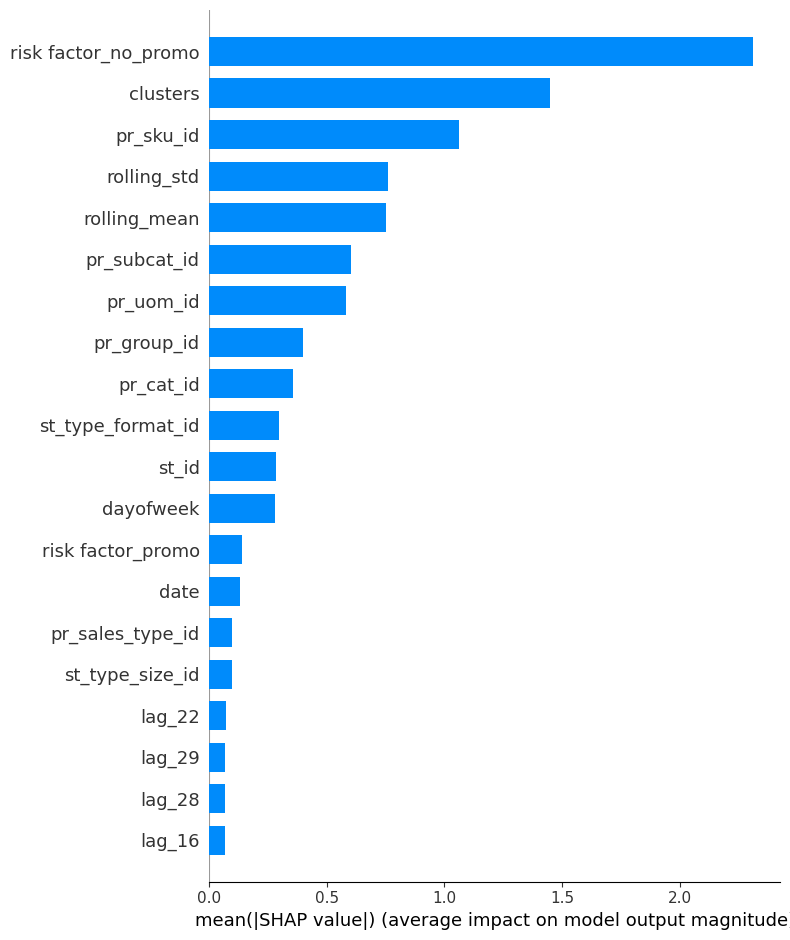

In [ ]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(features_test)
shap.summary_plot(shap_values, features_test, plot_type='bar')

### prophet

In [ ]:
# # Делаем df для Prophet
# predictions = 14
# prophet_df = df_full_sales[['date','pr_sales_in_units']]
# prophet_df.columns = ["ds","y"]
# train_df = prophet_df[:-predictions]

# # Создайте объект модели Prophet
# model = Prophet()

# # Обучите модель на данных продаж
# model.fit(train_df)

# # Сделайте прогноз
# future = model.make_future_dataframe(periods=predictions, freq='D')
# forecast = model.predict(future)

# # Проанализируйте прогноз
# forecast.plot()

# forecast = model.predict(future)

# # Рассчитайте метрики
# metrics = model.performance_metrics(forecast)

# # Выведите метрики
# print(metrics)

#Подбор гипперпараметров(на будущее)  

Вот несколько алгоритмов поиска гипперпараметров для бустингов, которые могут быть более быстрыми, чем RandomizedSearchCV:

  TPE: Tree-structured Parzen Estimator. Это метод байесовского поиска, который использует дерево решений для моделирования распределения целевой функции. TPE может быть более быстрым, чем RandomizedSearchCV, особенно для больших наборов данных.
  Optuna: Библиотека для оптимизации гиперпараметров, которая поддерживает различные алгоритмы поиска, включая TPE, RandomSearchCV и BayesianOptimization. Optuna может быть полезной для быстрого эксперимента с различными алгоритмами поиска.
  Hyperband: Алгоритм, который использует стратегию "убирания" для сокращения количества оценок модели. Hyperband может быть очень быстрым для больших наборов данных, но он может не достичь такой же точности, как другие методы.

TPE

TPE - это метод байесовского поиска, который использует дерево решений для моделирования распределения целевой функции. TPE сначала строит дерево решений на основе данных обучающей выборки. Затем дерево решений используется для генерации новых значений для гиперпараметров. Новые значения оцениваются на тестовой выборке, и лучшие из них используются для обучения модели.

TPE может быть более быстрым, чем RandomizedSearchCV, особенно для больших наборов данных. Это связано с тем, что TPE не оценивает все возможные комбинации значений гиперпараметров. Вместо этого, TPE использует дерево решений для генерации новых значений, которые, скорее всего, будут улучшить точность модели.

Optuna

Optuna - это библиотека для оптимизации гиперпараметров, которая поддерживает различные алгоритмы поиска, включая TPE, RandomSearchCV и BayesianOptimization. Optuna может быть полезной для быстрого эксперимента с различными алгоритмами поиска.

Optuna предлагает простой интерфейс для настройки алгоритмов поиска. Вы можете указать желаемую точность, время выполнения и другие параметры. Optuna затем будет использовать эти параметры для выбора алгоритма поиска, который наиболее подходит для ваших данных.

Hyperband

Hyperband - это алгоритм, который использует стратегию "убирания" для сокращения количества оценок модели. Hyperband сначала строит несколько моделей с небольшими наборами данных. Затем модели оцениваются на тестовой выборке, и лучшие из них используются для обучения модели с полным набором данных.

Hyperband может быть очень быстрым для больших наборов данных. Это связано с тем, что Hyperband не оценивает все возможные комбинации значений гиперпараметров. Вместо этого, Hyperband использует стратегию "убирания" для сокращения количества оценок модели.

# Pipeline

Алгоритм пайплайна (для тестов):

- Препроцессинг
- FE
- Модель
- Результат

In [ ]:
group = []
st_id = []

In [88]:
class preprocessing(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.loc[
            (X['pr_sales_in_rub'] >= 0) & (X['pr_promo_sales_in_rub'] >= 0)]
        X = X.loc[
            (X['pr_sales_in_units'] >= 0) & (X['pr_promo_sales_in_units'] >= 0)]
        X = X.loc[X['st_is_active'] == 1]
        X = X.loc[
        (X['st_id'] != 'bd470ca955d9497bbcb808e59952fffc') &
        (X['st_id'] != '084a8a9aa8cced9175bd07bc44998e75')]

        X = X.sort_values(by='date', ignore_index = True)

        X['price'] = np.where(
            X['pr_sales_in_units'] > 0,
            X['pr_sales_in_rub'] / X['pr_sales_in_units'],
            0)
        X['promo_price'] = np.where(
            X['pr_promo_sales_in_units'] > 0,
            X['pr_promo_sales_in_rub'] / X['pr_promo_sales_in_units'],
            0)


        return X

class feature_engineering(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def features_generation(self, X, max_lag, *rolling):
        self.df = pd.DataFrame(columns =['st_id', 'date', 'pr_sales_in_units'])
        for i in X['st_id'].unique():
            self.slices = X.loc[X['st_id'] == i]
            self.slices = self.slices[['st_id', 'date', 'pr_sales_in_units']]
            self.slices = self.slices.groupby(['st_id', 'date']).sum()
            for roll in rolling:
                self.slices['rol' + str(roll)] = self.slices['pr_sales_in_units'].shift().rolling(roll).mean()
            for lag in range(1, max_lag + 1):
                self.slices['lag_{}'.format(lag)] = self.slices['pr_sales_in_units'].shift(lag)
            self.slices = self.slices.reset_index()
            self.df = pd.concat([self.df, self.slices])
            self.df = self.df.drop(['pr_sales_in_units'], axis = 1)
        X = pd.merge(X, self.df, on=['st_id', 'date'])
        return X





    def transform(self, X):
        X = self.features_generation(X, 14, 14, 28)
        X['month'] = X['date'].dt.month
        X['day'] = X['date'].dt.day
        X['dayofweek'] = X['date'].dt.dayofweek
        X['year'] = X['date'].dt.year

        X = X.dropna()
        self.list_number_columns = [
                      'st_type_format_id','st_type_size_id', 'pr_uom_id', 'st_type_loc_id'
                      ]

        self.kmeans = KMeans(5,n_init=10, init="k-means++")
        self.kmeans.fit(X[self.list_number_columns])
        self.labels = self.kmeans.labels_
        X['clusters'] = self.labels

        self.ds = X['date']
        self.y = X['pr_sales_in_units']
        self.prof = pd.concat([self.ds, self.y], axis = 1)
        self.prof.columns = ['x', 'y']
        self.prof = self.prof.pivot_table(index = 'x', values = 'y', aggfunc = 'sum')
        self.prof['ds'] = self.prof.index
        self.model = Prophet()
        #Обучите модель на данных продаж
        self.model.fit(self.prof)
        #Сделайте прогноз
        self.future = self.model.make_future_dataframe(periods=14, freq='D')
        self.forecast = self.model.predict(self.future)
        self.forecast['date'] = self.forecast['ds']
        self.forecast = self.forecast.drop(['yhat'], axis = 1)
        X = pd.merge(X, self.forecast, on = 'date')
        list_col = [ 'date',  'holiday']

        X = X.merge(holidays_df[list_col], on="date",how='inner')
        X = X.drop('ds', axis = 1)
        # для каждого магзина risk factor
        self.markets = X['st_id'].unique()
        for market in self.markets:
        # Экспоненциальная скользящая средняя  alpha = 0,2
            self.row = X['st_id'] == market
            X.loc[self.row,'risk factor_promo'] = (
                X.loc[self.row,'pr_promo_sales_in_rub']/
            (X.loc[self.row,'pr_promo_sales_in_rub'].ewm(alpha=0.2).mean() + 1e-8)
            )
            X.loc[self.row,'risk factor_no_promo'] = (
                X.loc[self.row,'pr_sales_in_rub']/
            (X.loc[self.row,'pr_sales_in_rub'].ewm(alpha=0.2).mean() + 1e-8)
            )

        return X

class split(BaseEstimator, TransformerMixin):
        def fit(self, X, y=None):
            return self

        def transform(self, X):
            self.features = X.drop(
                ['pr_sales_in_units', 'pr_promo_sales_in_units',
                 'pr_sales_in_rub', 'pr_promo_sales_in_rub',
                 'price', 'promo_price'], axis = 1)
            self.target = X['pr_sales_in_units']
            self.features_train, self.features_test, self.target_train, self.target_test = train_test_split(
            self.features, self.target, test_size = 0.1, shuffle = False
                )
            return self.features_train, self.features_test, self.target_train, self.target_test

In [89]:
pipe_1 = Pipeline([
    ('preprocessing', preprocessing()),
    ('features_engineering', feature_engineering())

])

pipe_2 = Pipeline([
 ('split', split())
])

df_full_sales = pipe_1.fit_transform(df_full_sales)
features_train, features_test, target_train, target_test = pipe_2.fit_transform(df_full_sales)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcxsgkq3f/oy_4mcaw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcxsgkq3f/ebj4x9rw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29600', 'data', 'file=/tmp/tmpcxsgkq3f/oy_4mcaw.json', 'init=/tmp/tmpcxsgkq3f/ebj4x9rw.json', 'output', 'file=/tmp/tmpcxsgkq3f/prophet_modelb3gscc9d/prophet_model-20230927213633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [90]:
df_full_sales['clusters'].value_counts()


0    321857
1    253113
4    184616
2     37268
3     15468
Name: clusters, dtype: int64

In [85]:
df_full_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812322 entries, 0 to 812321
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   st_id                       812322 non-null  object        
 1   pr_sku_id                   812322 non-null  object        
 2   date                        812322 non-null  datetime64[ns]
 3   pr_sales_type_id            812322 non-null  int64         
 4   pr_sales_in_units           812322 non-null  float64       
 5   pr_promo_sales_in_units     812322 non-null  float64       
 6   pr_sales_in_rub             812322 non-null  float64       
 7   pr_promo_sales_in_rub       812322 non-null  float64       
 8   pr_group_id                 812322 non-null  object        
 9   pr_cat_id                   812322 non-null  object        
 10  pr_subcat_id                812322 non-null  object        
 11  pr_uom_id                   812322 non-

In [91]:
catigorical = ['st_id', 'pr_sku_id', 'pr_group_id', 'pr_cat_id',
               'pr_sales_type_id', 'pr_subcat_id', 'pr_uom_id',
               'st_city_id', 'st_division_code', 'st_type_format_id',
               'st_type_loc_id', 'st_type_size_id', 'st_is_active', 'month',
               'day', 'year', 'dayofweek', 'holiday', 'clusters']

In [92]:
scores = []
res = []
group_0 = ['1ff1de774005f8da13f42943881c655f', '3c59dc048e8850243be8079a5c74d079',
                                        '98f13708210194c475687be6106a3b84']
group_1 =  ['c20ad4d76fe97759aa27a0c99bff6710','6512bd43d9caa6e02c990b0a82652dca']
group_2 = ['c74d97b01eae257e44aa9d5bade97baf', 'aab3238922bcc25a6f606eb525ffdc56',
               '32bb90e8976aab5298d5da10fe66f21d', 'c51ce410c124a10e0db5e4b97fc2af39']
for i in df_full_sales['st_id'].unique():



        features_train_l = features_train.loc[(features_train['st_id'] == i)]
        target_train_l = target_train.loc[features_train_l.index]
        features_test_l = features_test.loc[(features_test['st_id'] == i)]
        target_test_l = target_test.loc[features_test_l.index]
        model_cb = CatBoostRegressor(iterations = 500, depth = 10, cat_features = catigorical, verbose = 5)
        model_cb.fit(features_train_l, target_train_l)
        preds = model_cb.predict(features_test_l)
        scores.append(wape(target_test_l, preds))
        res.append([i, k])

Learning rate set to 0.149389
0:	learn: 12.1867590	total: 431ms	remaining: 3m 35s
5:	learn: 9.1655778	total: 2.75s	remaining: 3m 46s
10:	learn: 7.6604173	total: 6.43s	remaining: 4m 46s
15:	learn: 6.7257007	total: 8.92s	remaining: 4m 29s
20:	learn: 6.2685189	total: 11s	remaining: 4m 10s
25:	learn: 5.8244587	total: 13s	remaining: 3m 57s
30:	learn: 5.4701059	total: 15s	remaining: 3m 46s
35:	learn: 5.2521883	total: 17.1s	remaining: 3m 39s
40:	learn: 5.0660040	total: 20.6s	remaining: 3m 50s
45:	learn: 4.9479078	total: 23.6s	remaining: 3m 53s
50:	learn: 4.8354947	total: 25.7s	remaining: 3m 46s
55:	learn: 4.7257125	total: 27.8s	remaining: 3m 40s
60:	learn: 4.6601886	total: 29.6s	remaining: 3m 32s
65:	learn: 4.6006883	total: 31.4s	remaining: 3m 26s
70:	learn: 4.5298526	total: 33.7s	remaining: 3m 23s
75:	learn: 4.4634785	total: 37.5s	remaining: 3m 29s
80:	learn: 4.3620888	total: 39.6s	remaining: 3m 24s
85:	learn: 4.2747753	total: 41.6s	remaining: 3m 20s
90:	learn: 4.1965926	total: 43.7s	remaini

In [93]:
(scores)

[0.407013408100799,
 0.25386761992266565,
 0.41153850743403303,
 0.5376232896328335,
 0.36998856536277436,
 0.39020115045391157,
 0.3091830952010088,
 0.39942107880118766]

In [96]:
res

[['f7e6c85504ce6e82442c770f7c8606f0',
  ['1ff1de774005f8da13f42943881c655f',
   '3c59dc048e8850243be8079a5c74d079',
   '98f13708210194c475687be6106a3b84']],
 ['1ecfb463472ec9115b10c292ef8bc986',
  ['1ff1de774005f8da13f42943881c655f',
   '3c59dc048e8850243be8079a5c74d079',
   '98f13708210194c475687be6106a3b84']],
 ['16a5cdae362b8d27a1d8f8c7b78b4330',
  ['1ff1de774005f8da13f42943881c655f',
   '3c59dc048e8850243be8079a5c74d079',
   '98f13708210194c475687be6106a3b84']],
 ['42a0e188f5033bc65bf8d78622277c4e',
  ['1ff1de774005f8da13f42943881c655f',
   '3c59dc048e8850243be8079a5c74d079',
   '98f13708210194c475687be6106a3b84']],
 ['c81e728d9d4c2f636f067f89cc14862c',
  ['1ff1de774005f8da13f42943881c655f',
   '3c59dc048e8850243be8079a5c74d079',
   '98f13708210194c475687be6106a3b84']],
 ['6364d3f0f495b6ab9dcf8d3b5c6e0b01',
  ['1ff1de774005f8da13f42943881c655f',
   '3c59dc048e8850243be8079a5c74d079',
   '98f13708210194c475687be6106a3b84']],
 ['53e19f3dbb211f20b20b45668303c1b6',
  ['1ff1de774005f8da

In [15]:
model_cb = CatBoostRegressor(iterations = 500, depth = 10, cat_features = catigorical, verbose = 5)
model_cb.fit(features_train, target_train)
preds = model_cb.predict(features_test)
wape(target_test, preds)

Learning rate set to 0.131555
0:	learn: 18.1125329	total: 265ms	remaining: 2m 12s
5:	learn: 12.7856165	total: 1.63s	remaining: 2m 14s
10:	learn: 10.2730997	total: 2.95s	remaining: 2m 11s
15:	learn: 9.1319662	total: 4.86s	remaining: 2m 26s
20:	learn: 8.5151963	total: 7.66s	remaining: 2m 54s
25:	learn: 8.1973421	total: 10.5s	remaining: 3m 11s
30:	learn: 7.9838144	total: 12.4s	remaining: 3m 7s
35:	learn: 7.6961060	total: 15s	remaining: 3m 12s
40:	learn: 7.5028551	total: 16.4s	remaining: 3m 4s
45:	learn: 7.3748707	total: 17.9s	remaining: 2m 56s
50:	learn: 7.2583395	total: 19.6s	remaining: 2m 52s
55:	learn: 7.1695700	total: 22.6s	remaining: 2m 58s
60:	learn: 7.0396528	total: 24.9s	remaining: 2m 59s
65:	learn: 6.9695700	total: 26.4s	remaining: 2m 53s
70:	learn: 6.9077357	total: 27.9s	remaining: 2m 48s
75:	learn: 6.7955147	total: 29.5s	remaining: 2m 44s
80:	learn: 6.7283919	total: 30.8s	remaining: 2m 39s
85:	learn: 6.6682400	total: 32.3s	remaining: 2m 35s
90:	learn: 6.5590557	total: 33.8s	rem

0.2265381274179099

In [ ]:
wape(target_test, preds)

0.3089391762534562

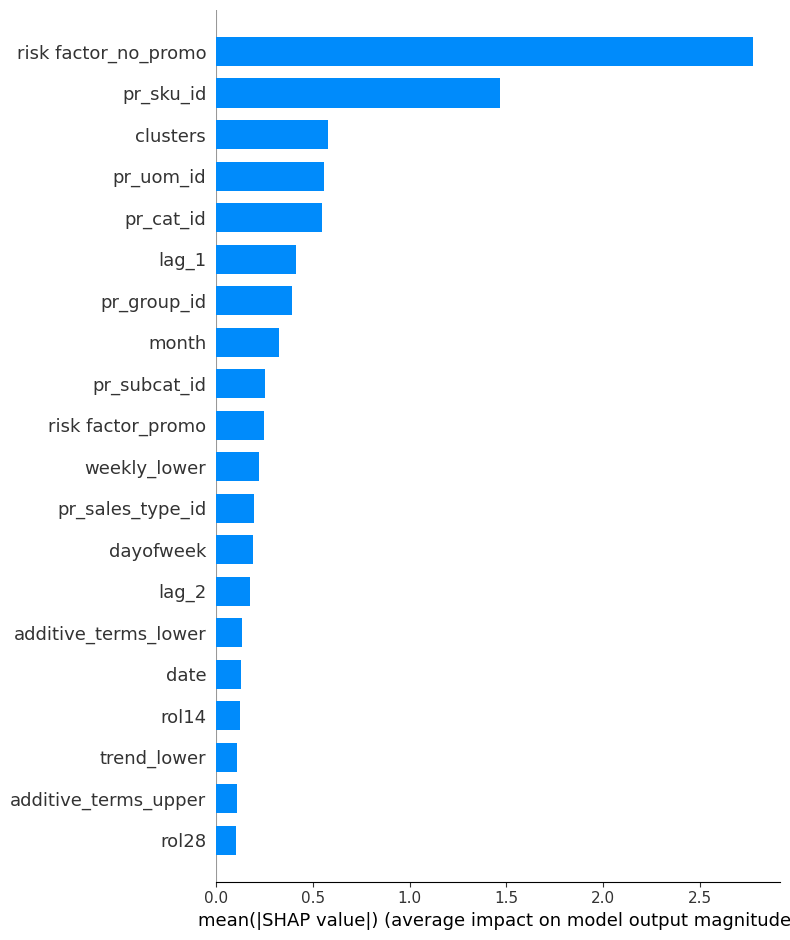

In [94]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(features_test)
shap.summary_plot(shap_values, features_test, plot_type='bar')

In [95]:
df_full_sales['st_id'].value_counts()

c81e728d9d4c2f636f067f89cc14862c    161583
16a5cdae362b8d27a1d8f8c7b78b4330    145869
42a0e188f5033bc65bf8d78622277c4e    129212
f7e6c85504ce6e82442c770f7c8606f0    113739
6364d3f0f495b6ab9dcf8d3b5c6e0b01    106753
fa7cdfad1a5aaf8370ebeda47a1ff1c3    102430
1ecfb463472ec9115b10c292ef8bc986     43961
53e19f3dbb211f20b20b45668303c1b6      8775
Name: st_id, dtype: int64